# Analiza sklepów Walmart                                      
##### Wykonano na potrzeby projektu zaliczeniowego z przedmiotu: Analiza danych z obszaru Big Data
##### Autor: Slawomir Kranc                                                      

##### Opis zbioru danych :

Są to dane historyczne, które obejmują sprzedaż od 2010-02-05 do 2012-11-01. W pliku tym znajdują się następujące pola:

Store - numer sklepu

Data - tydzień, w którym nastąpiła sprzedaż

Weekly_Sales - sprzedaż dla danego sklepu

Holiday_Flag - czy dany tydzień jest tygodniem świątecznym: 1 - Tydzień świąteczny; 0 - Tydzień nie świąteczny

Temperature - temperatura w dniu sprzedaży

Fuel_Price - koszt paliwa w regionie

CPI - Obowiązujący indeks cen konsumpcyjnych

Unemployment - Obowiązująca stopa bezrobocia

Wydarzenia świąteczne:

Super Bowl: 2010-02-12, 2011-02-11, 2012-02-10

Święto Pracy: 2010-08-10, 2011-09-09, 2012-09-07

Święto Dziękczynienia: 2010-11-26, 2011-11-25, 2012-11-23

Boże Narodzenie: 2010-12-31, 2011-12-30, 2012-12-28

##### Wymagania początkowe:
- umieść oba pliki dane i kod skryptu w tej samej lokalizacji (folderze).

Ustawianie ścieżki lokalnej

instalacja brakujących pakietów

wczytanie bibliotek

In [1]:
setwd("./")

if(!("tidyverse" %in% installed.packages())){
  install.packages("tidyr", dependencies = TRUE)
}

if(!("ggplot2" %in% installed.packages())){
  install.packages("ggplot2", dependencies = TRUE)
}

if(!("summarytools" %in% installed.packages())){
  install.packages("summarytools", dependencies = TRUE)
}

library(tidyverse)
library(ggplot2)
library(summarytools)
library(lubridate)

options(scipen = 100)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.1     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Dołączanie pakietu: 'summarytools'


Następujący obiekt został zakryty z 'package:tibble':

    view



Dołączanie pakietu: 'lubridate'


Następujące obiekty zostały zakryte z 'package:base':

    date, intersect, setdiff, union




Wczytanie danych oraz standaryzacja dat (rok-miesiąc-dzień)

In [2]:
dane <- read_csv("Walmart.csv",show_col_types = FALSE)

dane <- dane %>%
  mutate(Date = dmy(Date))

### Podstawowa analiza eksploracyjna

In [3]:
descr(dane)
view(dfSummary(dane))

,CPI,Fuel_Price,Holiday_Flag,Store,Temperature,Unemployment,Weekly_Sales
Mean,171.57839385,3.35860684,0.06993007,23.00000000,60.66378244,7.99915105,1046964.87756177
Std.Dev,39.35671230,0.45901971,0.25504894,12.98818238,18.44493288,1.87588478,564366.62205370
Min,126.06400000,2.47200000,0.00000000,1.00000000,-2.06000000,3.87900000,209986.25000000
Q1,131.73500000,2.93300000,0.00000000,12.00000000,47.43000000,6.89100000,552985.34000000
Median,182.61652050,3.44500000,0.00000000,23.00000000,62.67000000,7.87400000,960746.04000000
Q3,212.74689800,3.73500000,0.00000000,34.00000000,74.95000000,8.62200000,1420405.41000000
Max,227.23280680,4.46800000,1.00000000,45.00000000,100.14000000,14.31300000,3818686.45000000
MAD,60.87813647,0.56190540,0.00000000,16.30860000,20.29679400,1.28837940,631596.11012400
IQR,81.00829345,0.80200000,0.00000000,22.00000000,27.48000000,1.73100000,866808.55500000
CV,0.22938035,0.13666968,3.64719990,0.56470358,0.30405181,0.23451048,0.53905020


Switching method to 'browser'

Output file written: C:\Users\SLAWOM~1.KRA\AppData\Local\Temp\RtmpcN2HO9\file4e6423736799.html



Wśród analizowanych danych znalazło się 45 sklepów spośród których analizowano sprzedaż tygodniową oraz wpływające na nią parametry.

Podczas analizy stwierdzono, że średnia sprzedaż we wszystkich sklepach wyniosła ok. 1046964,88 USD z odchyleniem standardowym na poziomie 564366.62 USD.

Średni index cen konsumpcyjnych (CPI) wyniósł ok. 171.58 z odchyleniem standardowym na poziomie 39,36.

Średnia cena paliwa wyniosła 3,36 USD z odchyleniem standardowym na poziomie 0,46 USD.

Podczas badnego okresu średnia temperatura wyniosła ok. 60°F co daje odpowiednio ok. 15,5°C. 

Należy zwrócić uwage na wskaźnik bezrobocia, który wahał się od wartości 3,9 aż do 14,3


# ---------------------------------------------------------------------------------------------------------------

Kreśląc wykres sprzedaży tygodniowej można zauważyć, iż jest on asymetryczny, skośny prawostronnie. Biorąc pod uwagę średnią sprzedaż na poziomie ok. 1046965 USD zauważyć można tendencję, że spora część sklepów sprzedaje poniżej średniej.

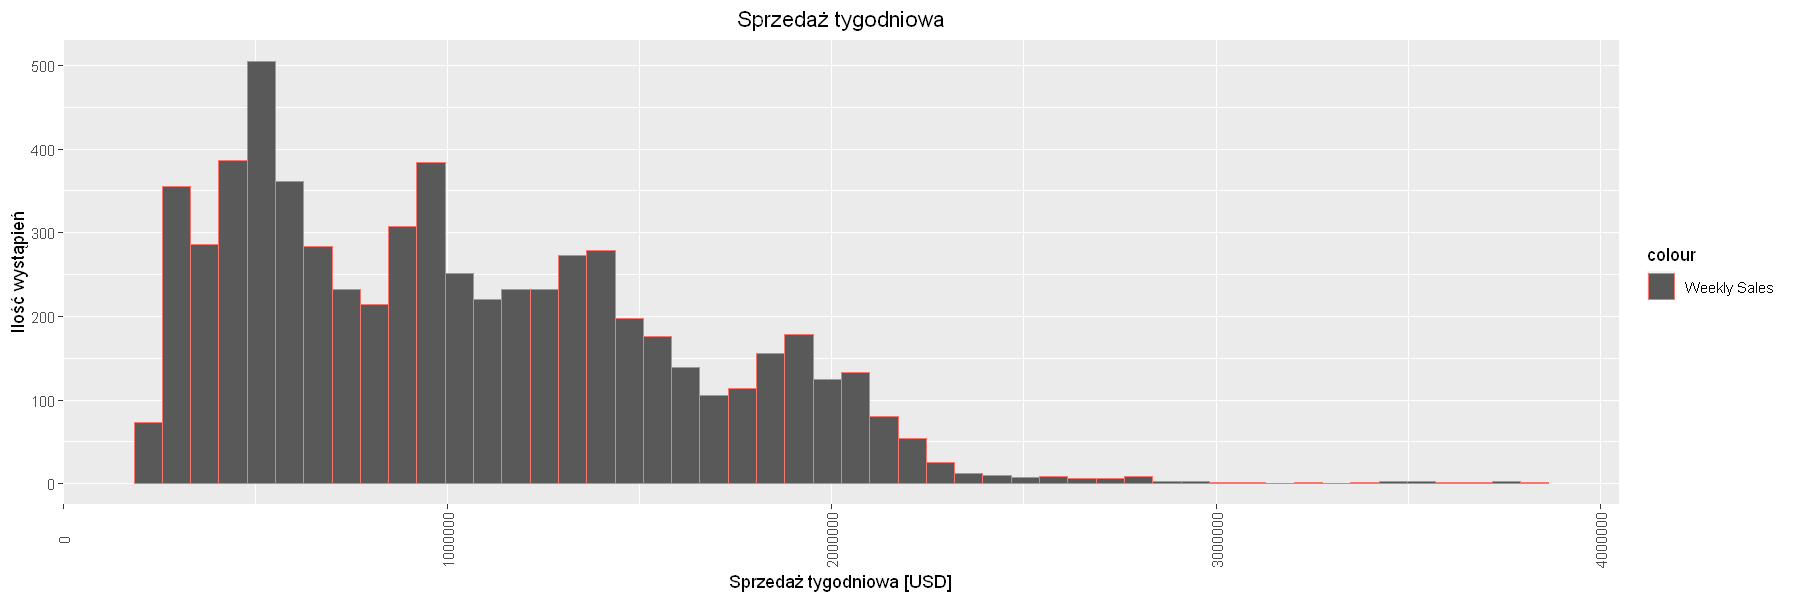

In [4]:
options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(dane, aes(x=Weekly_Sales, color='Weekly Sales')) + 
  geom_histogram(bins=50)+
  xlab("Sprzedaż tygodniowa [USD]")+
  ylab("Ilość wystąpień")+
  ggtitle("Sprzedaż tygodniowa")+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5),plot.title = element_text(hjust = 0.5))

# ---------------------------------------------------------------------------------------------------------------

Poniższa tabela obrazuje sprzedaż uporządkowaną malejaco. Sklep 20 jest liderem sprzedaży

Store,Total_Sales
<dbl>,<dbl>
20,301397792
4,299543953
14,288999911
13,286517704
2,275382441
10,271617714


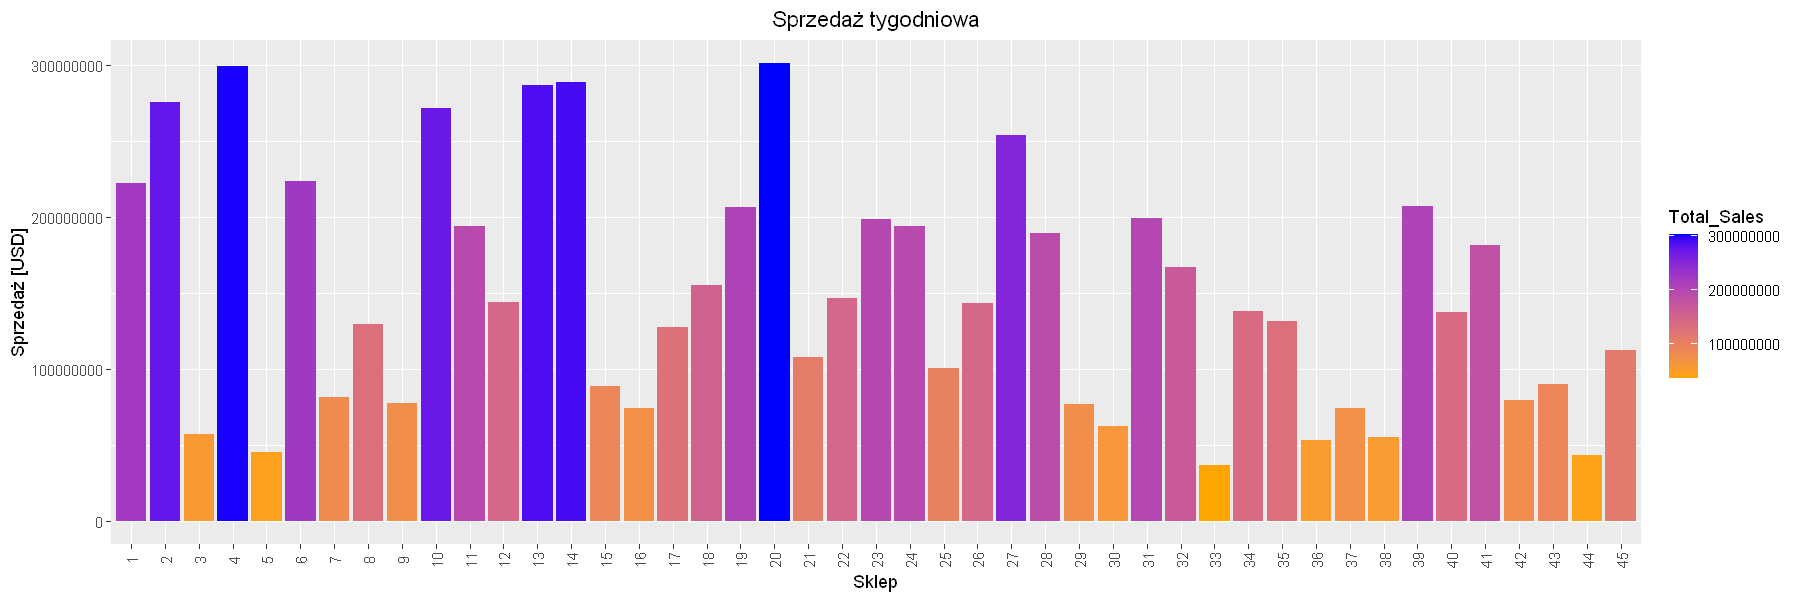

In [5]:
Maximum_Sales <- dane %>% 
  group_by(Store) %>%
  summarize(Total_Sales=sum(Weekly_Sales))

head(arrange(Maximum_Sales,desc(Total_Sales)))

options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(Maximum_Sales,aes(x=factor(Store),y=Total_Sales,fill=Total_Sales)) +
  geom_col()+
  xlab("Sklep")+
  ylab("Sprzedaż [USD]")+
  ggtitle("Sprzedaż tygodniowa")+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5),plot.title = element_text(hjust = 0.5))+
  scale_fill_gradient(low="orange", high="blue")


# ---------------------------------------------------------------------------------------------------------------

Poniżej można zaobserwować, że najbardziej zróżnicowaną sprzedaż posiada sklep 14, jej wskaźnik CV wynosi 0,157

Store,sd,mean,CV
<dbl>,<dbl>,<dbl>,<dbl>
14,317569.9,2020978,0.1571367
10,302262.1,1899425,0.1591335
20,275900.6,2107677,0.1309027
4,266201.4,2094713,0.1270825
13,265507.0,2003620,0.1325136
23,249788.0,1389864,0.1797211


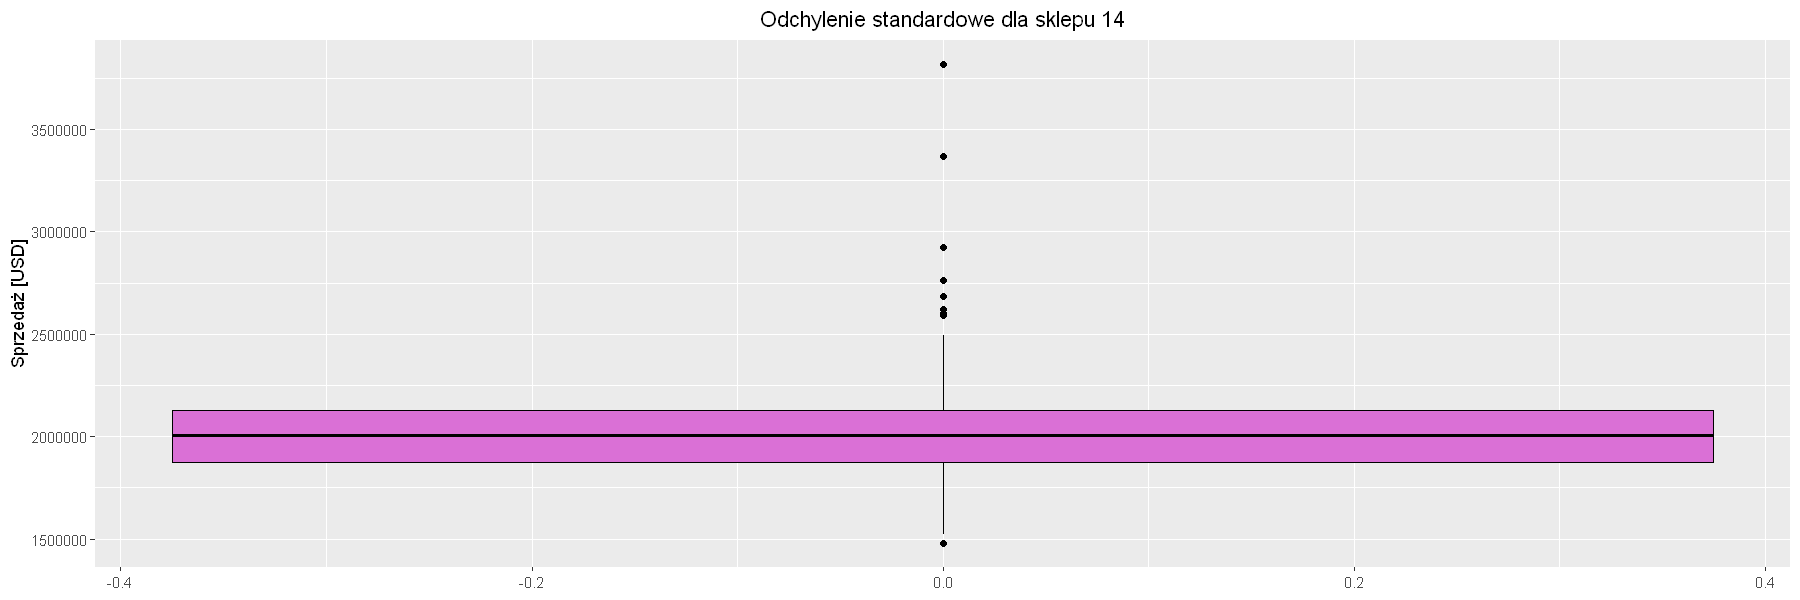

In [6]:
Diff <- dane %>% 
  group_by(Store) %>% 
  summarize(sd= sd(Weekly_Sales),mean= mean(Weekly_Sales),CV= sd/mean) %>%
  arrange(desc(sd))
head(Diff)

options(repr.plot.width = 15, repr.plot.height = 5)
dane %>%
  filter(Store == 14) %>%
  ggplot(aes(y=Weekly_Sales)) + 
  geom_boxplot(colour="black",fill="orchid")+ 
  ylab("Sprzedaż [USD]")+
  ggtitle("Odchylenie standardowe dla sklepu 14") +
  theme(plot.title = element_text(hjust = 0.5))

# ---------------------------------------------------------------------------------------------------------------

Ogólnie rzecz biorąc sprzedaż w okresie Świąt Bożego Narodzenia spada w porównaniu ze zwykłym okresem roboczym. Święto Dziękczynienia natomiast zwiększa średnią sprzedaż. Pozostałe święta są zbliżone do wartości średniej sprzedaży.

Holiday,average_sales
<chr>,<dbl>
Święto dziękczynienia,1471273.4
Super Bowl,1079128.0
Święto pracy,1056592.1
Zwykły dzień,1041053.7
Boże Narodzenie,960833.1


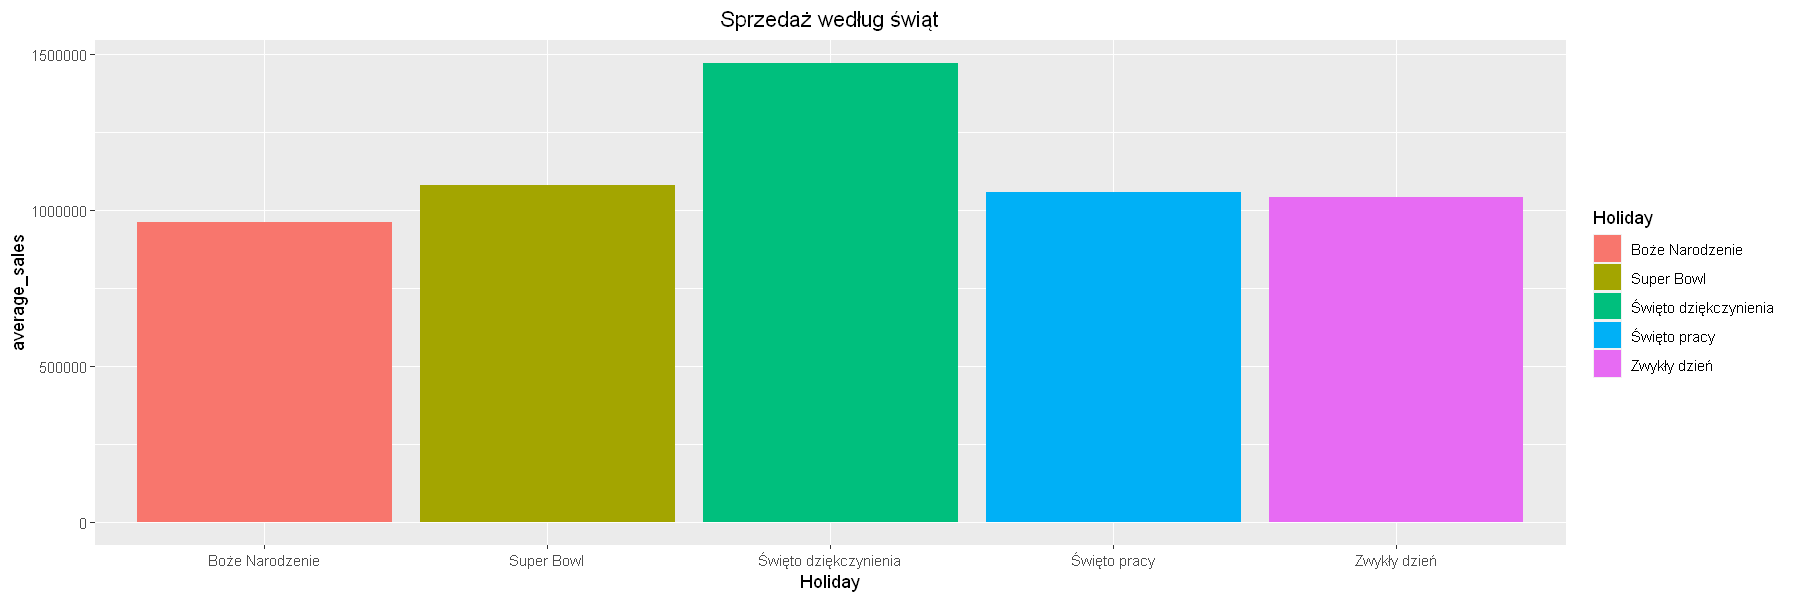

In [7]:
Super_Bowl <- c('2010-02-12', '2011-02-11', '2012-02-10')
Super_Bowl <- ymd(Super_Bowl)

Labour_Day <- c('2010-08-10', '2011-09-09', '2012-09-07')
Labour_Day <- ymd(Labour_Day)

Thanksgiving <- c('2010-11-26', '2011-11-25', '2012-11-23')
Thanksgiving <- ymd(Thanksgiving)

Christmas <- c('2010-12-31', '2011-12-30', '2012-12-28')
Christmas <- ymd(Christmas)

holiday_sales <- dane %>%
  mutate(Holiday = case_when(Date %in% Super_Bowl ~ "Super Bowl",
                             Date %in% Labour_Day ~ "Święto pracy",
                             Date %in% Thanksgiving ~ "Święto dziękczynienia",
                             Date %in% Christmas ~ "Boże Narodzenie",
                             TRUE ~ "Zwykły dzień"))

holiday_sales %>%
  select(Weekly_Sales,Holiday) %>%
  group_by(Holiday) %>%
  summarise(average_sales = mean(Weekly_Sales)) %>%
  arrange(desc(average_sales))


options(repr.plot.width = 15, repr.plot.height = 5)
holiday_sales %>%
  select(Weekly_Sales,Holiday) %>%
  group_by(Holiday) %>%
  summarise(average_sales = mean(Weekly_Sales)) %>%
  ggplot(aes(x=Holiday,y=average_sales,fill=Holiday)) + 
  geom_col() + 
  ggtitle("Sprzedaż według świąt") + 
  theme(plot.title = element_text(hjust = 0.5))

# ---------------------------------------------------------------------------------------------------------------

Poniżej przedstawiono zestawienie sprzedaży we wszystkich sklepach w okresie 3 lat. Zauważyć można tendencję najwyższej sprzedaży w roku 2011. Natomiast w 2012 roku można zaobserować gigantyczne spadki szczególnie widać to w przypadku sklepów nr. 14, 20 i 27.

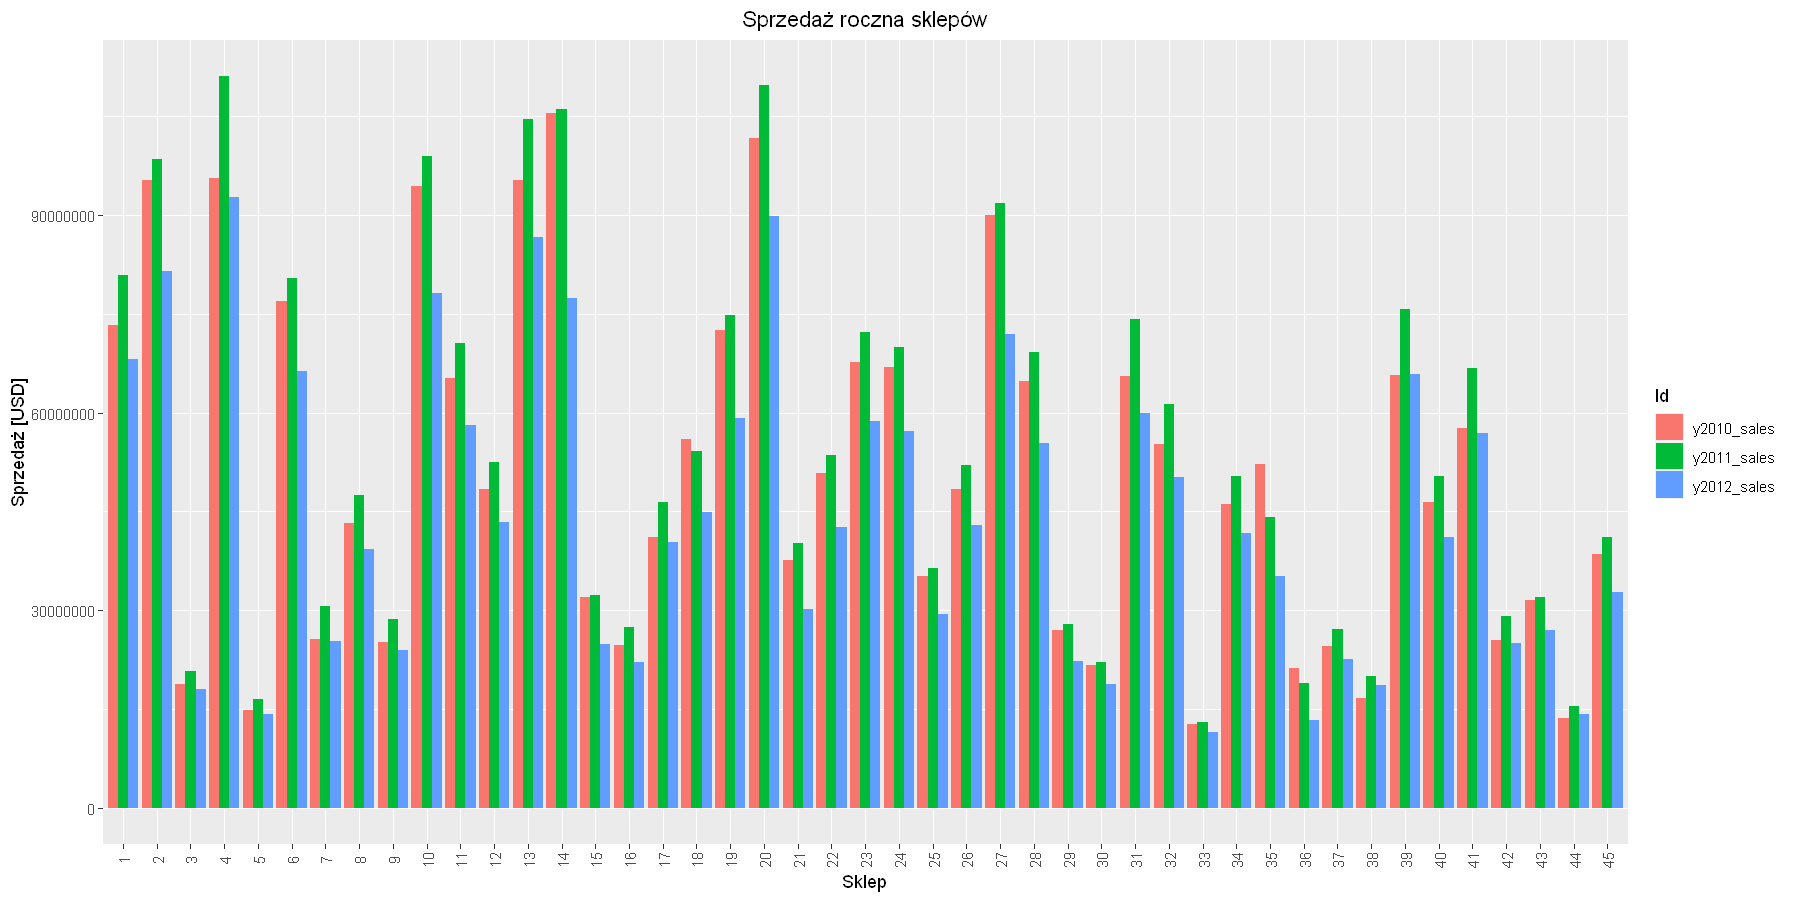

In [8]:
y2010_sales <- dane %>%
  group_by(Store) %>%
  filter(Date >= "2010-01-01", Date <= "2010-12-31") %>%
  summarise(y2010_sales = sum(Weekly_Sales))

y2011_sales <- dane %>%
  group_by(Store) %>%
  filter(Date >= "2011-01-01", Date <= "2011-12-31") %>%
  summarise(y2011_sales = sum(Weekly_Sales))

y2012_sales <- dane %>%
  group_by(Store) %>%
  filter(Date >= "2012-01-01", Date <= "2012-12-31") %>%
  summarise(y2012_sales = sum(Weekly_Sales))

year_sales <- left_join(y2010_sales, y2011_sales, by="Store") %>%
  left_join(., y2012_sales, by="Store")

options(repr.plot.width = 15, repr.plot.height = 7.5)
year_sales %>%
  gather("Id","Sales",2:4) %>%
  ggplot(aes(fill=Id,x=factor(Store),y=Sales)) + 
  geom_col(position="dodge") + xlab("Store") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5),plot.title = element_text(hjust = 0.5))+
  xlab("Sklep")+
  ylab("Sprzedaż [USD]")+
  ggtitle("Sprzedaż roczna sklepów")

# ---------------------------------------------------------------------------------------------------------------

Na poniższych wykresach przedstawiono miesięczną sprzedaż każdego roku. Można dostrzec trend w postaci wybijającego się przed szereg grudnia, prawdopodobnie ze względu na wzmożoną sprzedaż świąteczą.

In [9]:
monthly_data <- dane %>%
  mutate(Month = month(Date,label = TRUE),Year = year(Date),Quarter = as.character(quarter(Date,with_year = TRUE)))

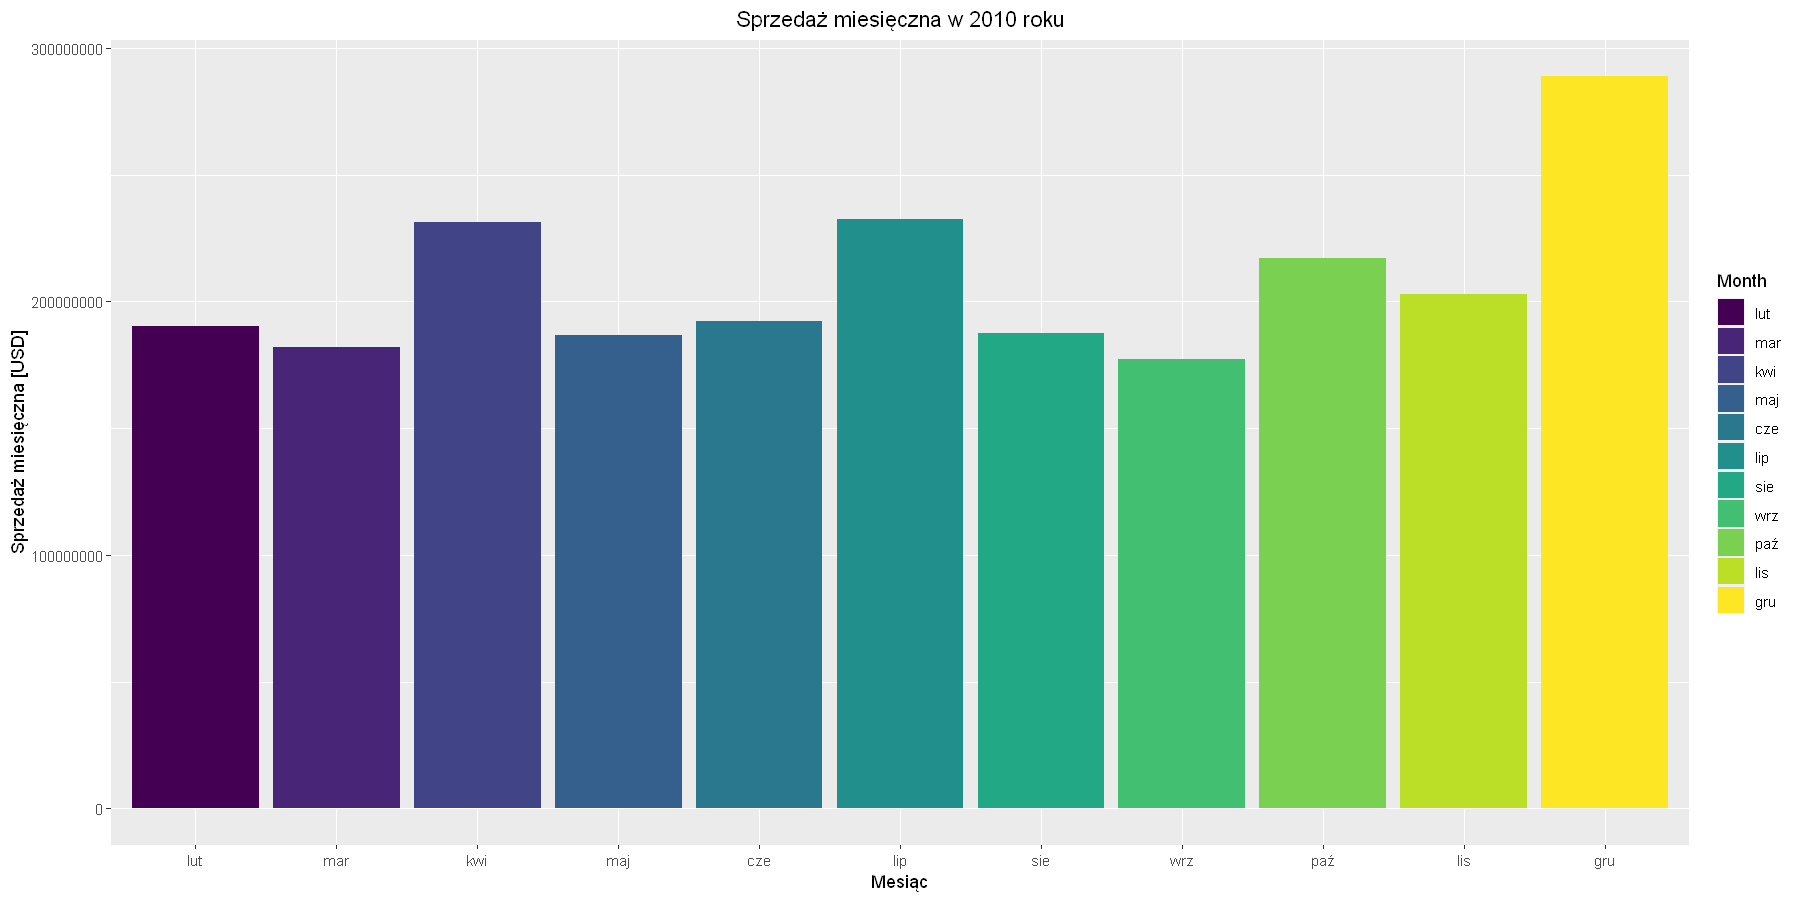

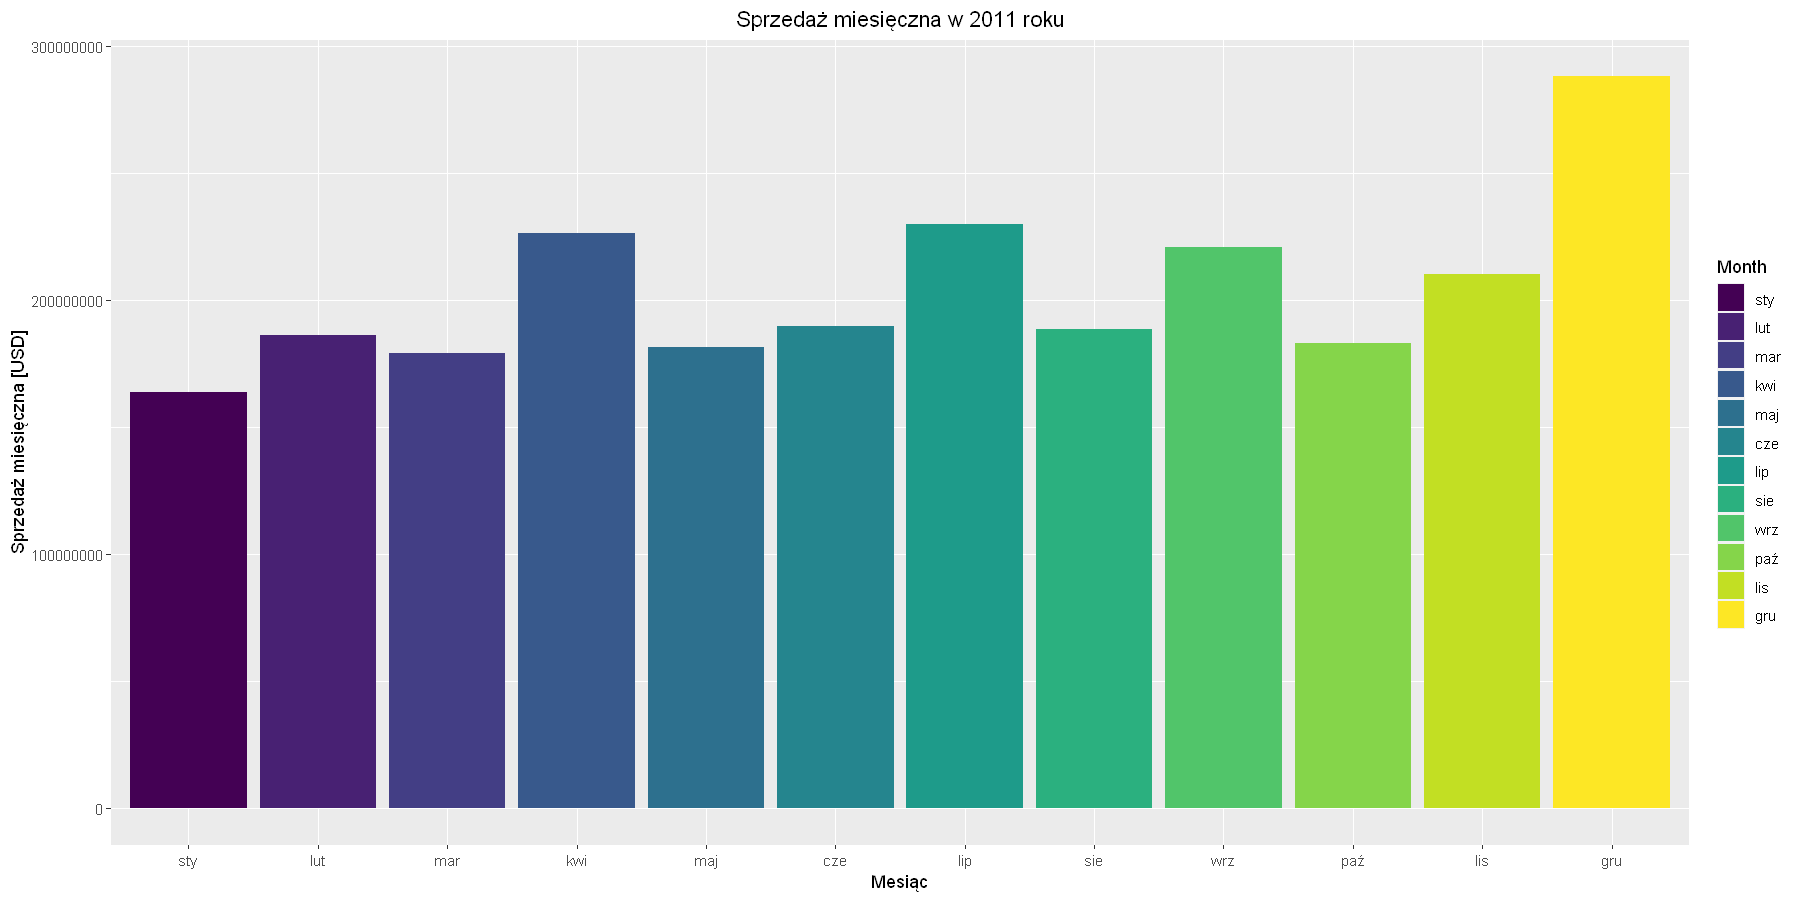

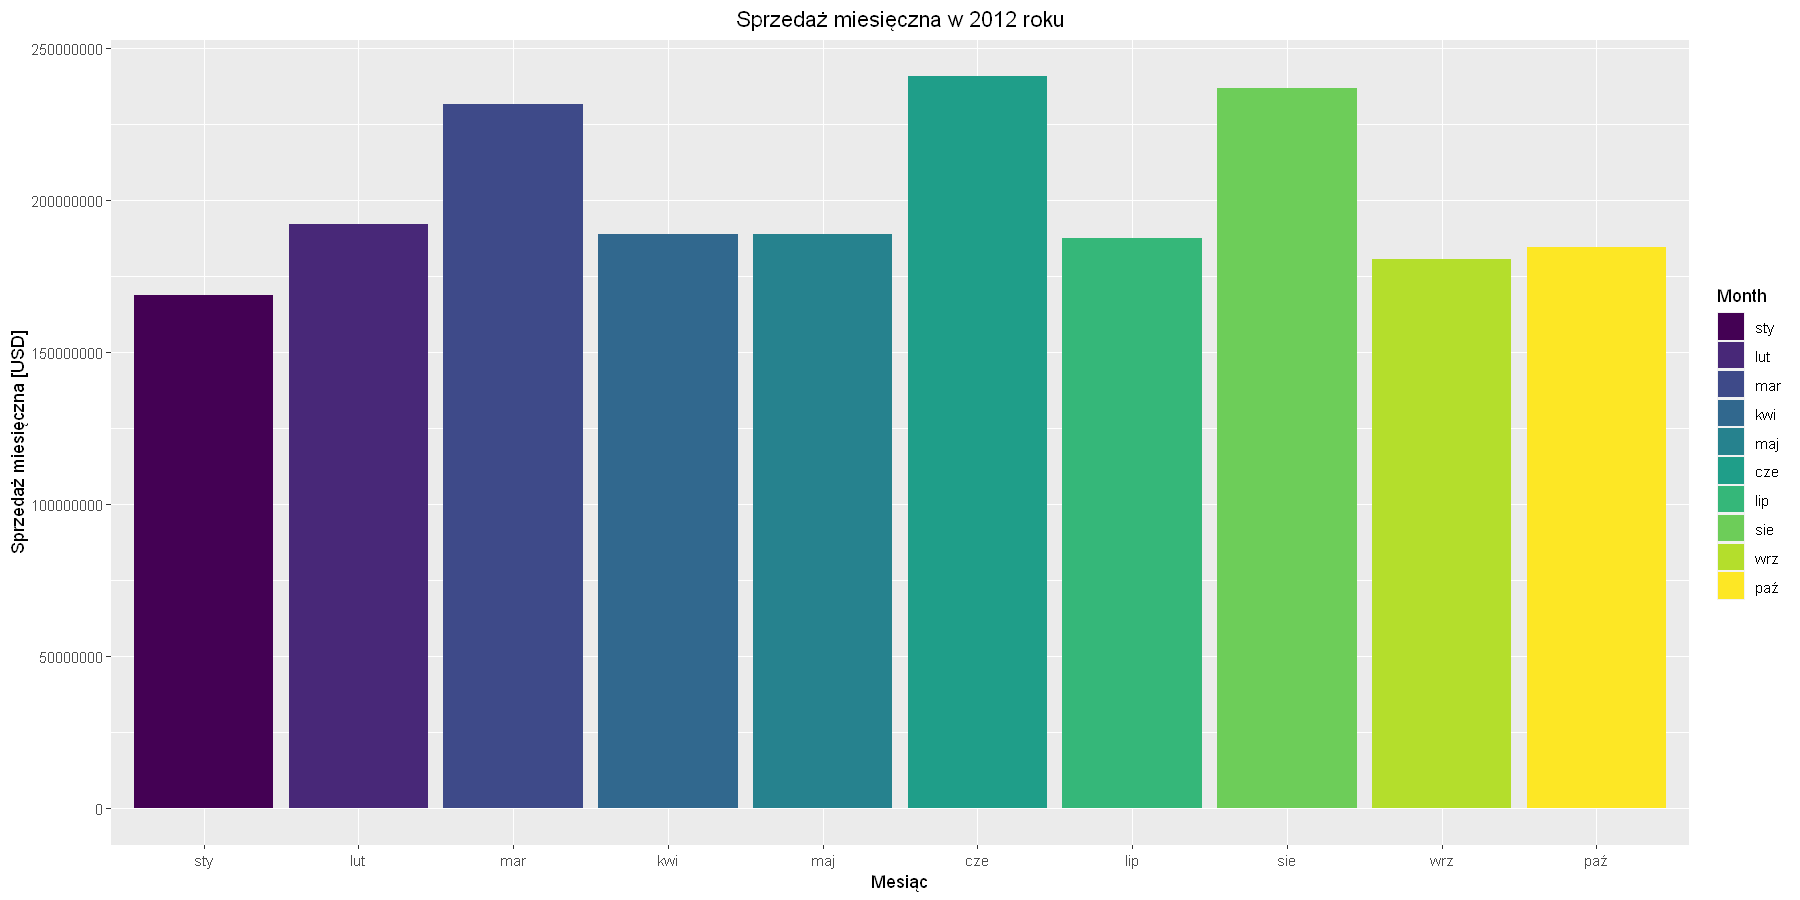

In [10]:
options(repr.plot.width = 15, repr.plot.height = 7.5)
monthly_data %>%
  filter(Year == 2010) %>%
  group_by(Month) %>%
  summarise(Monthly_sale = sum(Weekly_Sales)) %>% 
    ggplot(aes(x=Month,y=Monthly_sale,fill=Month)) + 
    geom_col() + 
    xlab("Mesiąc")+
    ylab("Sprzedaż miesięczna [USD]")+
    ggtitle("Sprzedaż miesięczna w 2010 roku") +
    theme(plot.title = element_text(hjust = 0.5))

options(repr.plot.width = 15, repr.plot.height = 7.5)
monthly_data %>%
  filter(Year == 2011) %>%
  group_by(Month) %>%
  summarise(Monthly_sale = sum(Weekly_Sales)) %>% 
    ggplot(aes(x=Month,y=Monthly_sale,fill=Month)) + 
    geom_col() + 
    xlab("Mesiąc")+
    ylab("Sprzedaż miesięczna [USD]")+
    ggtitle("Sprzedaż miesięczna w 2011 roku") +
    theme(plot.title = element_text(hjust = 0.5))

options(repr.plot.width = 15, repr.plot.height = 7.5)
monthly_data %>%
  filter(Year == 2012) %>%
  group_by(Month) %>%
  summarise(Monthly_sale = sum(Weekly_Sales)) %>% 
    ggplot(aes(x=Month,y=Monthly_sale,fill=Month)) + 
    geom_col() + 
    xlab("Mesiąc")+
    ylab("Sprzedaż miesięczna [USD]")+
    ggtitle("Sprzedaż miesięczna w 2012 roku") +
    theme(plot.title = element_text(hjust = 0.5))

# ---------------------------------------------------------------------------------------------------------------

Najwyższą sprzedaż odnotowano w 4 kwartale 2010 roku, natomiast najniższą w 4 2012 roku.

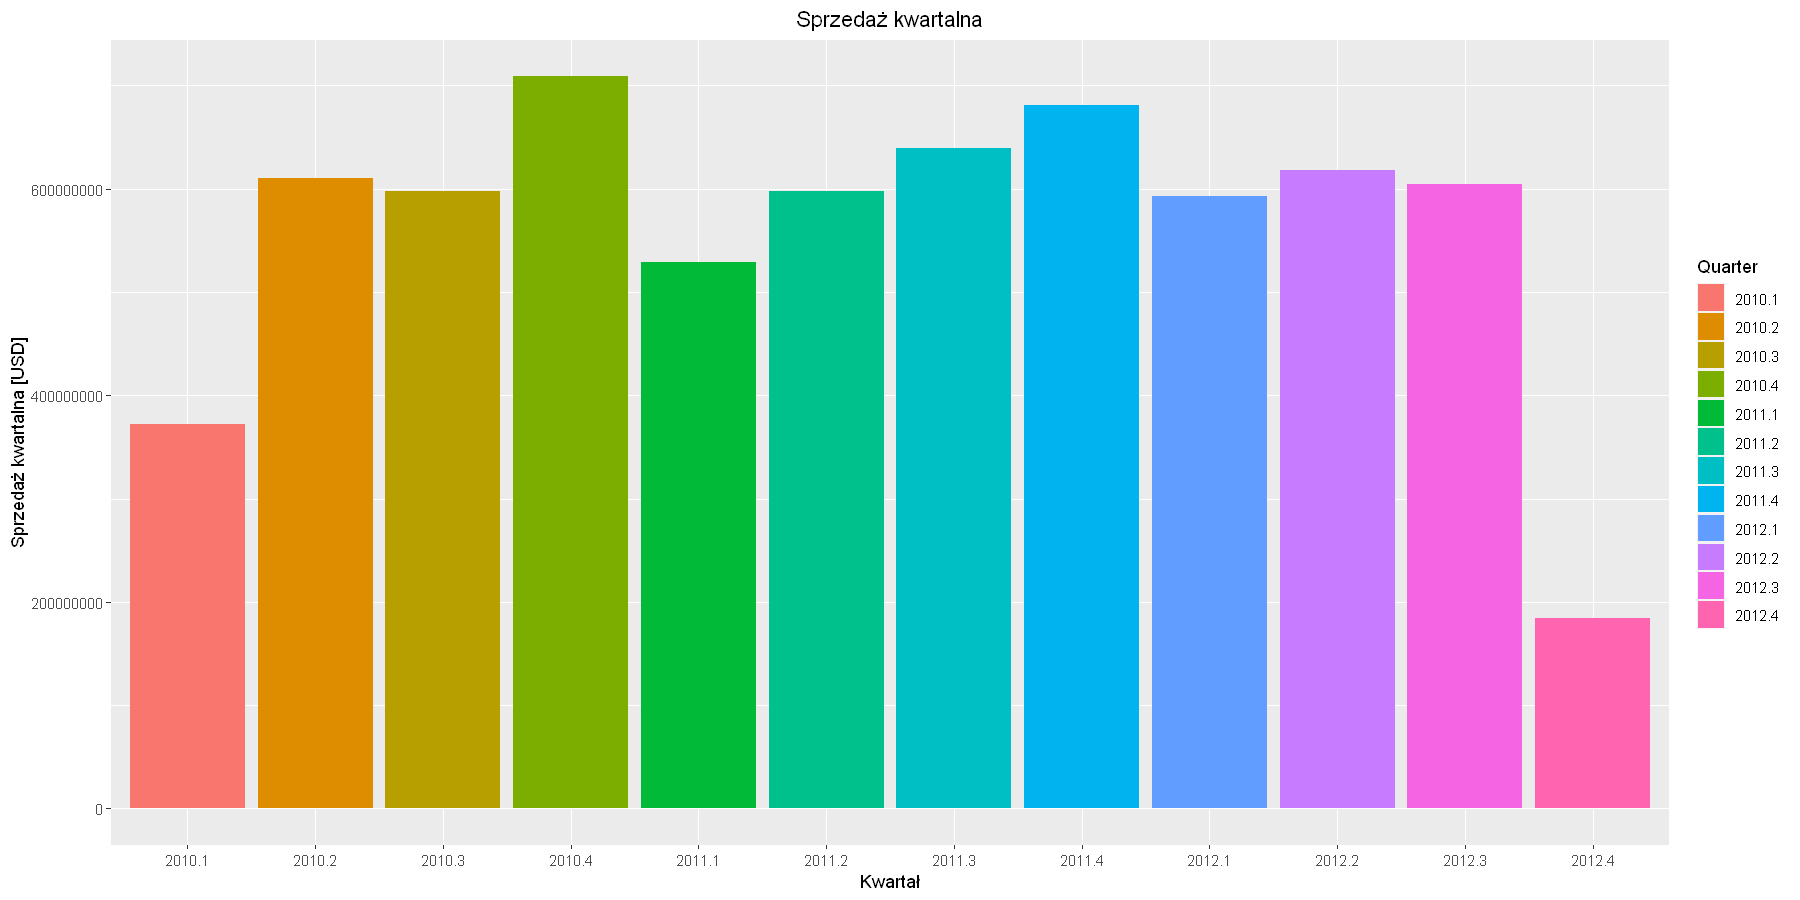

In [11]:
options(repr.plot.width = 15, repr.plot.height = 7.5)
monthly_data %>% 
  group_by(Quarter) %>%
  summarise(Quarter_sales = sum(Weekly_Sales)) %>%
  ggplot(aes(x=Quarter,y=Quarter_sales,fill=Quarter)) + 
  geom_col() + 
  xlab("Kwartał")+
  ylab("Sprzedaż kwartalna [USD]")+
  ggtitle("Sprzedaż kwartalna") +
  theme(plot.title = element_text(hjust = 0.5))

# ---------------------------------------------------------------------------------------------------------------

Analiza wykazuje, że ceny paliwa na przestrzni trzech lat wzrosły, mogło to mieć wpływ na zaniżone wyniki sprzedaży sklepów Walmart.

,Fuel_2010,Fuel_2011,Fuel_2012
Mean,2.823767130,3.561914957,3.709776227
Std.Dev,0.166077456,0.288578025,0.276533556
Min,2.472000000,2.882000000,3.031000000
Q1,2.708000000,3.355000000,3.545000000
Median,2.796000000,3.580000000,3.717000000
Q3,2.938000000,3.784000000,3.891000000
Max,3.336000000,4.211000000,4.468000000
MAD,0.166051200,0.308380800,0.255007200
IQR,0.230000000,0.429000000,0.346000000
CV,0.058814147,0.081017663,0.074541843


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using formula 'y ~ x'



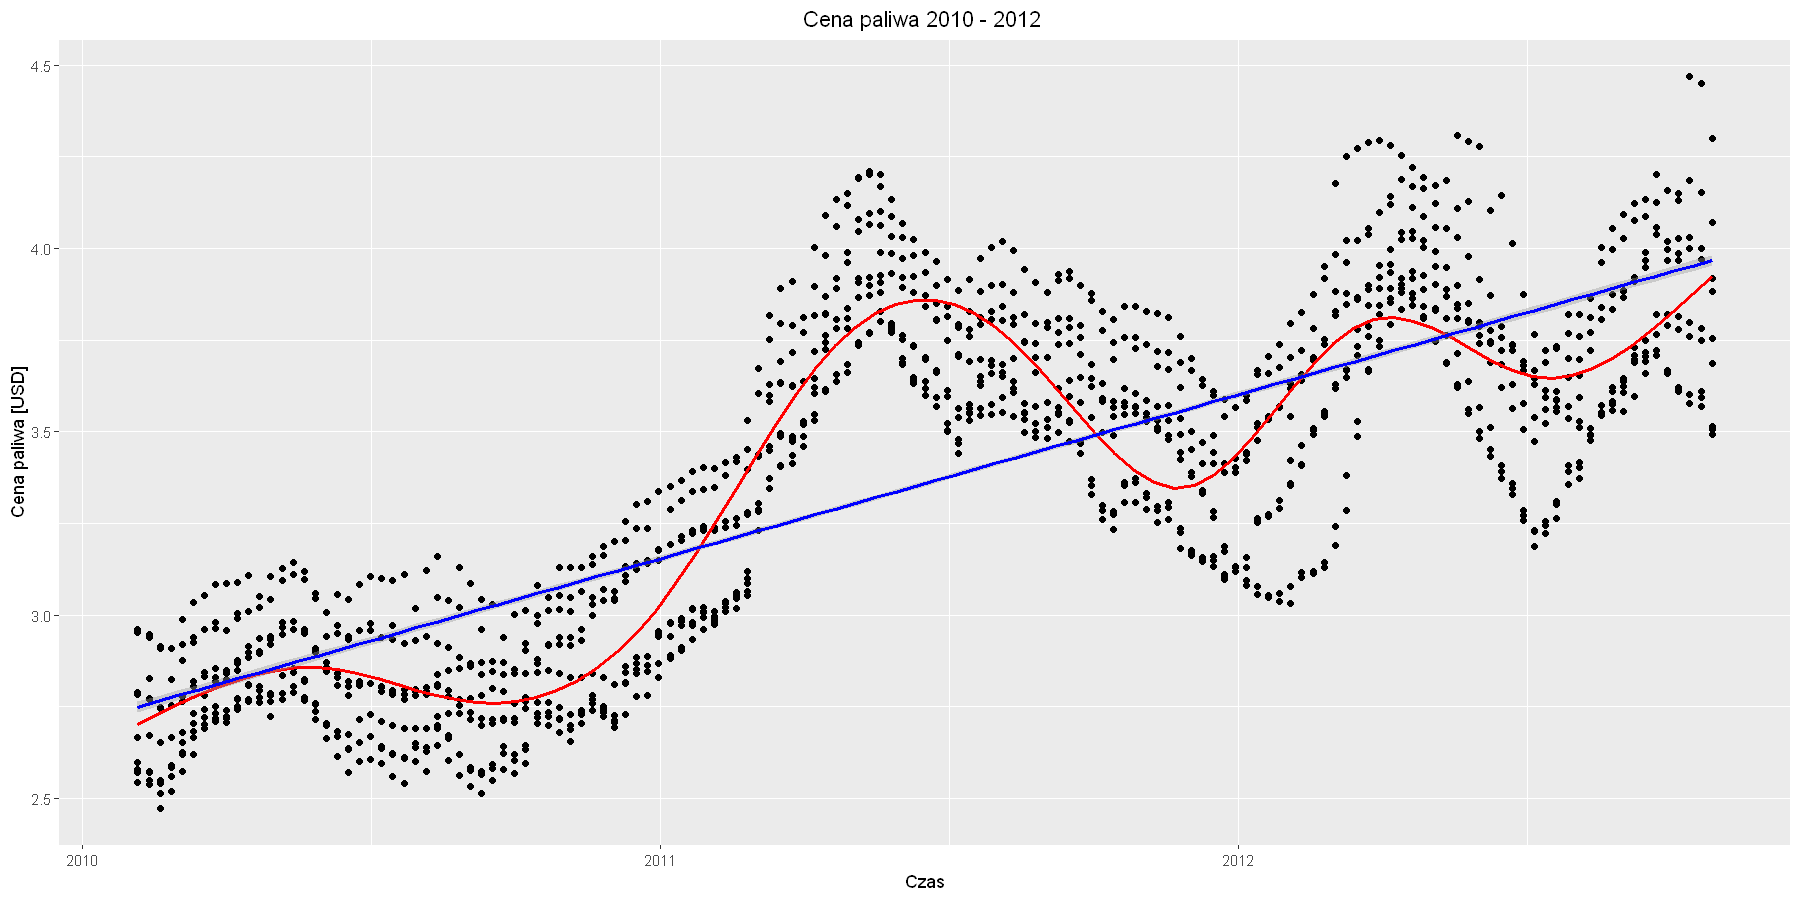

In [12]:
y2010_fuel <- dane %>%
  filter(Date >= "2010-01-01", Date <= "2010-12-31") %>%
  select(Fuel_Price, Store)

y2011_fuel <- dane %>%
  filter(Date >= "2011-01-01", Date <= "2011-12-31") %>%
  select(Fuel_Price, Store)

y2012_fuel <- dane %>%
  filter(Date >= "2012-01-01", Date <= "2012-12-31") %>%
  select(Fuel_Price, Store)

total_fuel <- left_join(y2010_fuel, y2011_fuel, by="Store") %>%
  left_join(., y2012_fuel, by="Store") %>%
  select(Fuel_Price.x, Fuel_Price.y, Fuel_Price)

names(total_fuel)[1] <- 'Fuel_2010'
names(total_fuel)[2] <- 'Fuel_2011'
names(total_fuel)[3] <- 'Fuel_2012'

descr(total_fuel)


year_fuel <- dane %>%
  select(Fuel_Price, Date)

options(repr.plot.width = 15, repr.plot.height = 7.5)
ggplot(year_fuel, aes(x=Date, y=Fuel_Price)) + 
  geom_point() +
  geom_smooth(se=F, color="red") +
  geom_smooth(method='lm', color='blue') +
  xlab("Czas")+
  ylab("Cena paliwa [USD]") +
  ggtitle("Cena paliwa 2010 - 2012 ") +
  theme(plot.title = element_text(hjust = 0.5))

# ---------------------------------------------------------------------------------------------------------------

Co ciekawe, bezrobocie w okresie badanych 3 lat zmalało o średnio 1 pkt. procentowy.

,Unemployment_2010,Unemployment_2011,Unemployment_2012
Mean,8.492714352,8.082035897,7.347963824
Std.Dev,1.856287662,1.877602628,1.699026471
Min,5.287000000,4.420000000,3.879000000
Q1,7.508000000,7.082000000,6.228000000
Median,8.200000000,7.852000000,7.147000000
Q3,9.014000000,8.523000000,8.253000000
Max,14.313000000,14.021000000,12.187000000
MAD,1.174219200,1.014098400,1.487047800
IQR,1.506000000,1.441000000,2.025000000
CV,0.218574131,0.232318026,0.231224120


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using formula 'y ~ x'



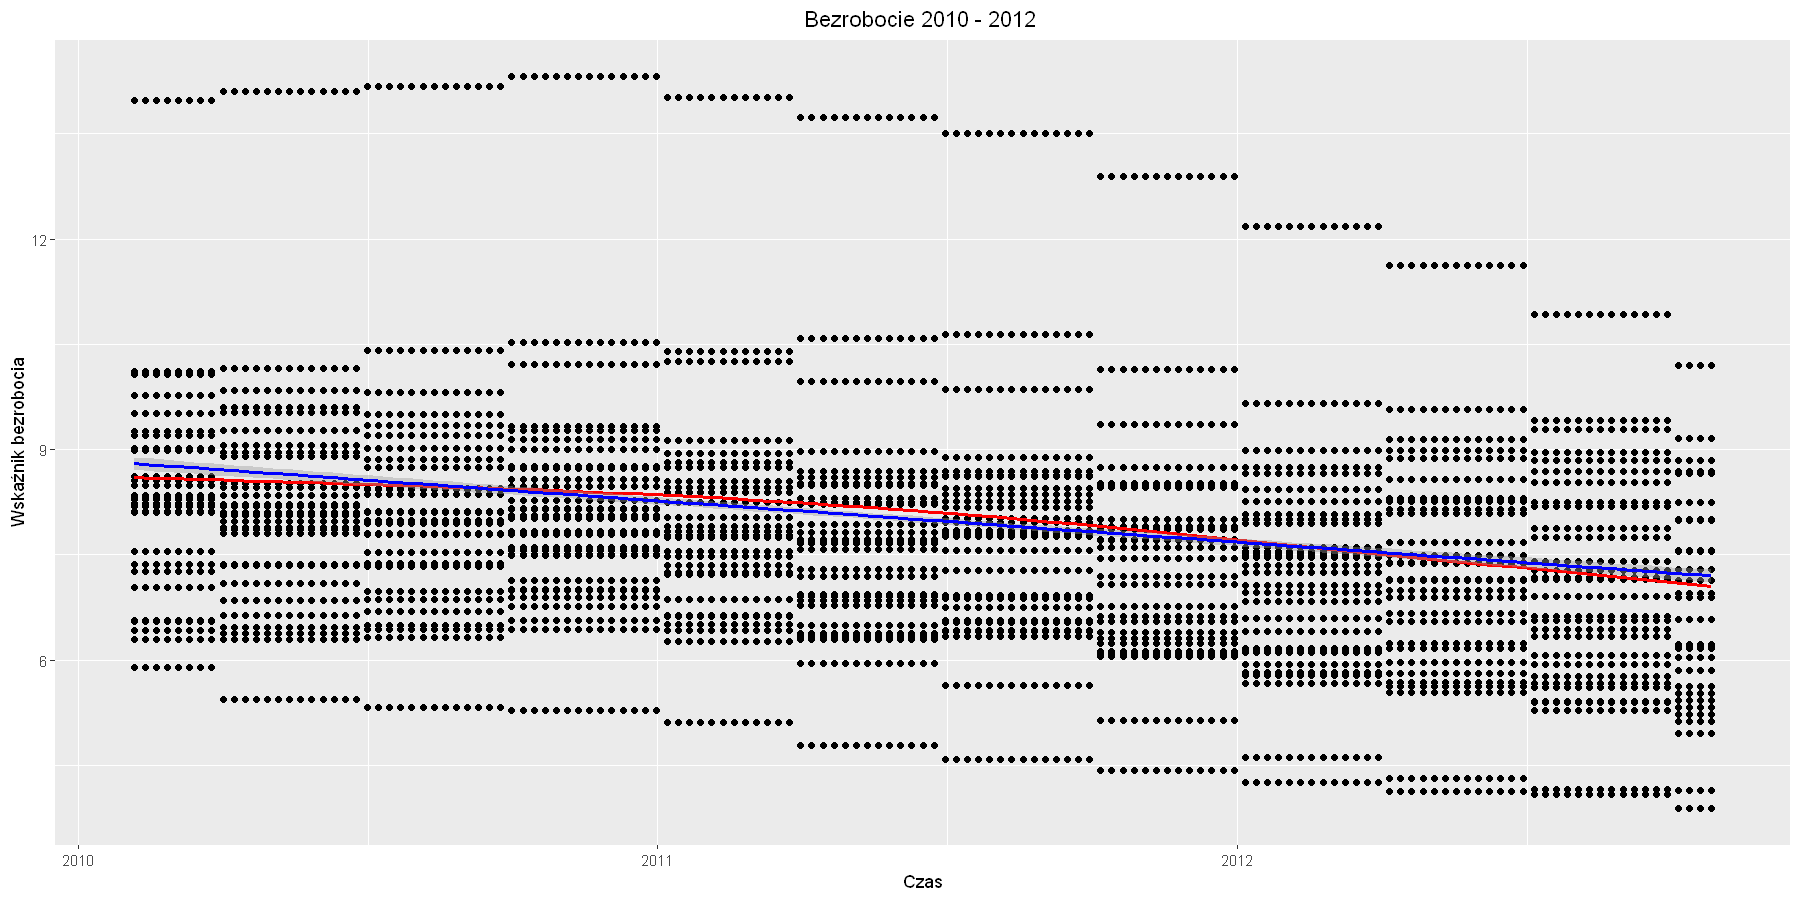

In [13]:
y2010_unemployment <- dane %>%
  filter(Date >= "2010-01-01", Date <= "2010-12-31") %>%
  select(Unemployment, Store)

y2011_unemployment <- dane %>%
  filter(Date >= "2011-01-01", Date <= "2011-12-31") %>%
  select(Unemployment, Store)

y2012_unemployment <- dane %>%
  filter(Date >= "2012-01-01", Date <= "2012-12-31") %>%
  select(Unemployment, Store)

total_unemployment <- left_join(y2010_unemployment, y2011_unemployment, by="Store") %>%
  left_join(., y2012_unemployment, by="Store") %>%
  select(Unemployment.x, Unemployment.y, Unemployment)

names(total_unemployment)[1] <- 'Unemployment_2010'
names(total_unemployment)[2] <- 'Unemployment_2011'
names(total_unemployment)[3] <- 'Unemployment_2012'

descr(total_unemployment)


year_unemployment <- dane %>%
  select(Unemployment, Date)

options(repr.plot.width = 15, repr.plot.height = 7.5)
ggplot(year_unemployment, aes(x=Date, y=Unemployment)) + 
  geom_point() +
  geom_smooth(se=F, color='red') +
  geom_smooth(method='lm', color='blue') +
  xlab("Czas")+
  ylab("Wskaźnik bezrobocia") +
  ggtitle("Bezrobocie 2010 - 2012 ") +
  theme(plot.title = element_text(hjust = 0.5))

# ---------------------------------------------------------------------------------------------------------------

Jak pokazuje poniższa analiza oraz wykresy korelacja między temperaturą a sprzedażą jest bardzo nisko w dodatku ta tendencja jest zniżkowa w perspektywie badanych 3 lat.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



Korelacja sprzedaży do temperatury w 2010 roku wyniosła: -0.1023765

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



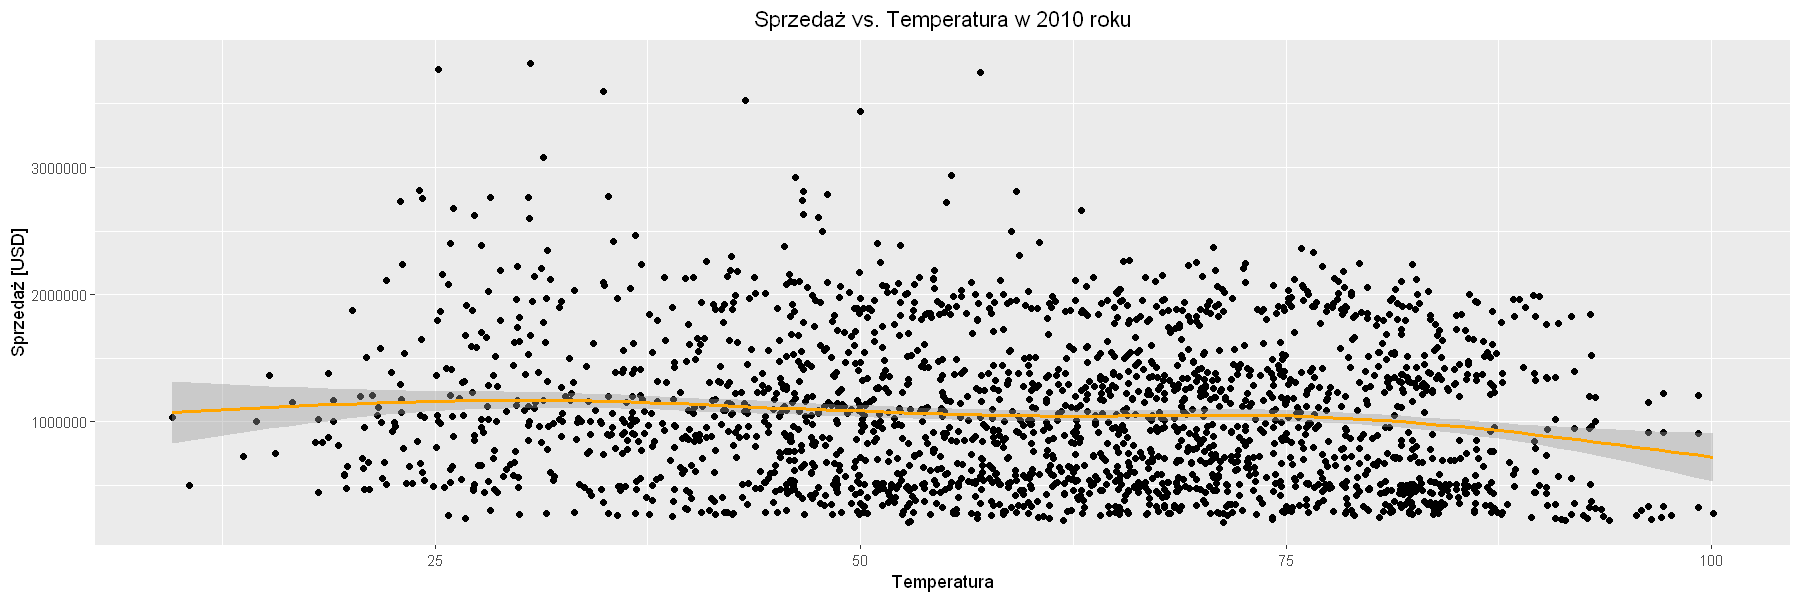

Korelacja sprzedaży do temperatury w 2011 roku wyniosła: -0.05764464

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



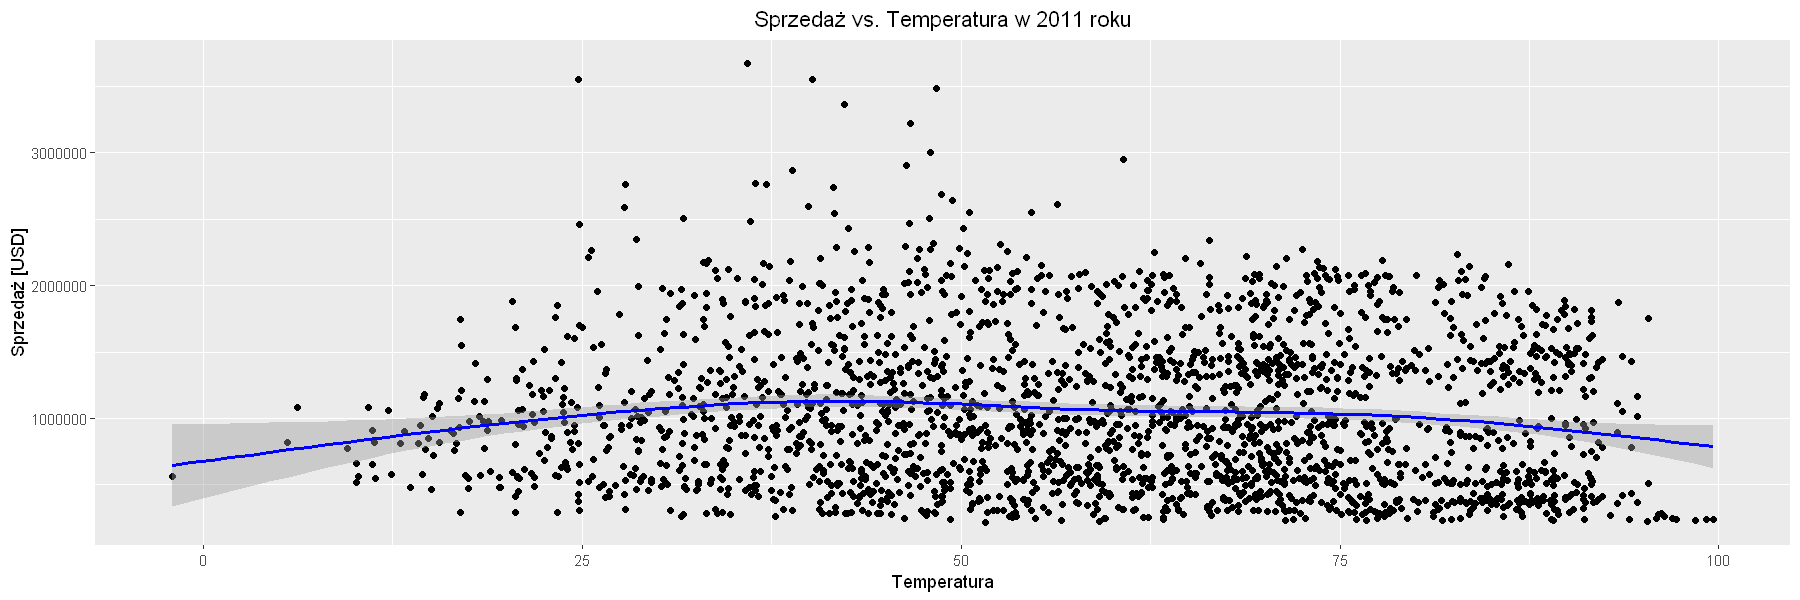

Korelacja sprzedaży do temperatury w 2012 roku wyniosła: -0.02046812

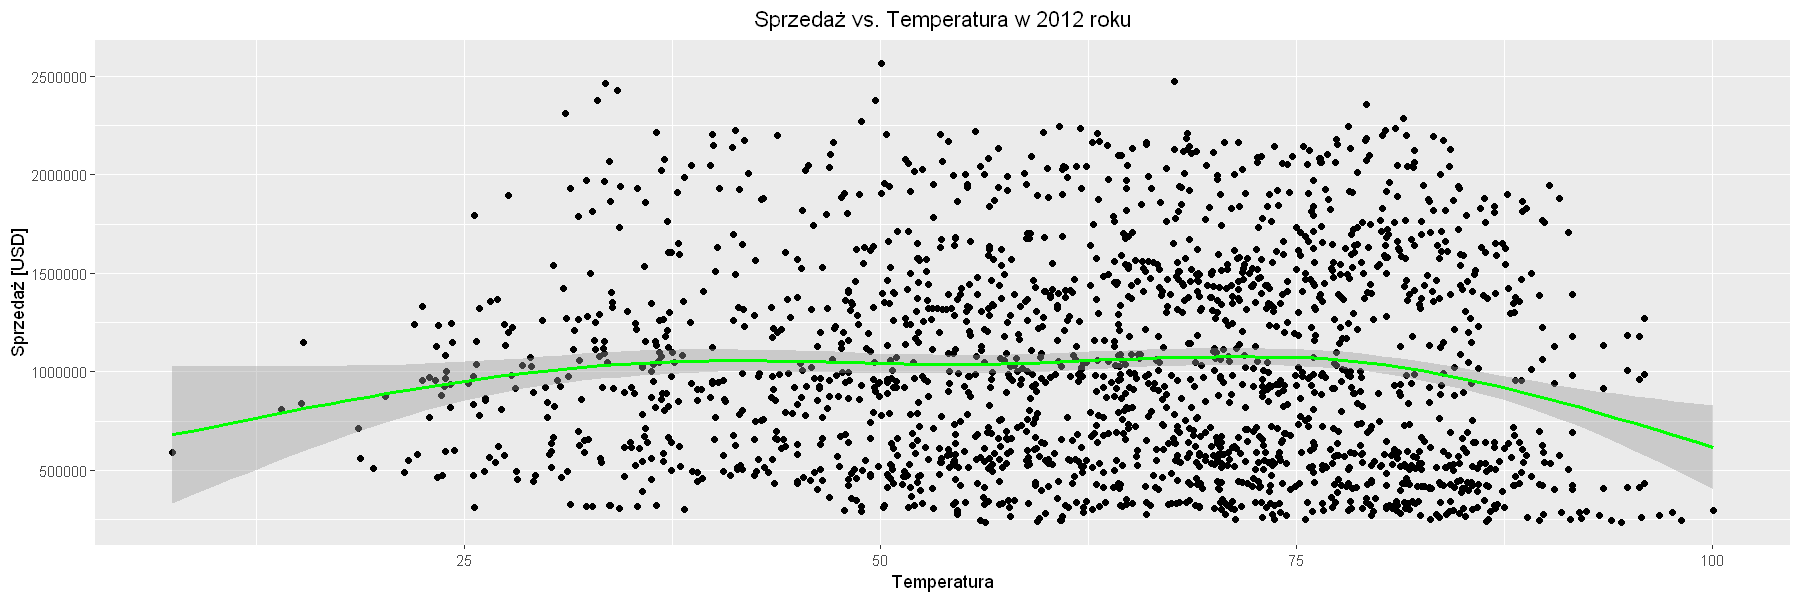

In [14]:
y2010_df <- dane %>%
  filter(Date >= "2010-01-01", Date <= "2010-12-31")

y2011_df <- dane %>%
  filter(Date >= "2011-01-01", Date <= "2011-12-31")

y2012_df <- dane %>%
  filter(Date >= "2012-01-01", Date <= "2012-12-31")


options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(y2010_df,aes(x=Temperature,y=Weekly_Sales)) + 
geom_point() + 
geom_smooth(color="orange") +
ggtitle("Sprzedaż vs. Temperatura w 2010 roku") + 
xlab("Temperatura") +
ylab("Sprzedaż [USD]") +
theme(plot.title = element_text(hjust = 0.5))
cat("Korelacja sprzedaży do temperatury w 2010 roku wyniosła:", cor(y2010_df$Weekly_Sales,y2010_df$Temperature))


options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(y2011_df,aes(x=Temperature,y=Weekly_Sales)) + 
geom_point() + 
geom_smooth(color="blue") +
ggtitle("Sprzedaż vs. Temperatura w 2011 roku") + 
xlab("Temperatura") +
ylab("Sprzedaż [USD]") +
theme(plot.title = element_text(hjust = 0.5))
cat("Korelacja sprzedaży do temperatury w 2011 roku wyniosła:", cor(y2011_df$Weekly_Sales,y2011_df$Temperature))


options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(y2012_df,aes(x=Temperature,y=Weekly_Sales)) + 
geom_point() + 
geom_smooth(color="green") +
ggtitle("Sprzedaż vs. Temperatura w 2012 roku") + 
xlab("Temperatura") +
ylab("Sprzedaż [USD]") +
theme(plot.title = element_text(hjust = 0.5))
cat("Korelacja sprzedaży do temperatury w 2012 roku wyniosła:", cor(y2012_df$Weekly_Sales,y2012_df$Temperature))

# ---------------------------------------------------------------------------------------------------------------

Poniżej zbadano korelację sprzedaży i bezrobocia. Stwierdzono, że korelacja również jest bardzo niska na poziomie -0,1.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



Korelacja sprzedaży do bezrobocia w 2010 roku wyniosła: -0.08470811

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



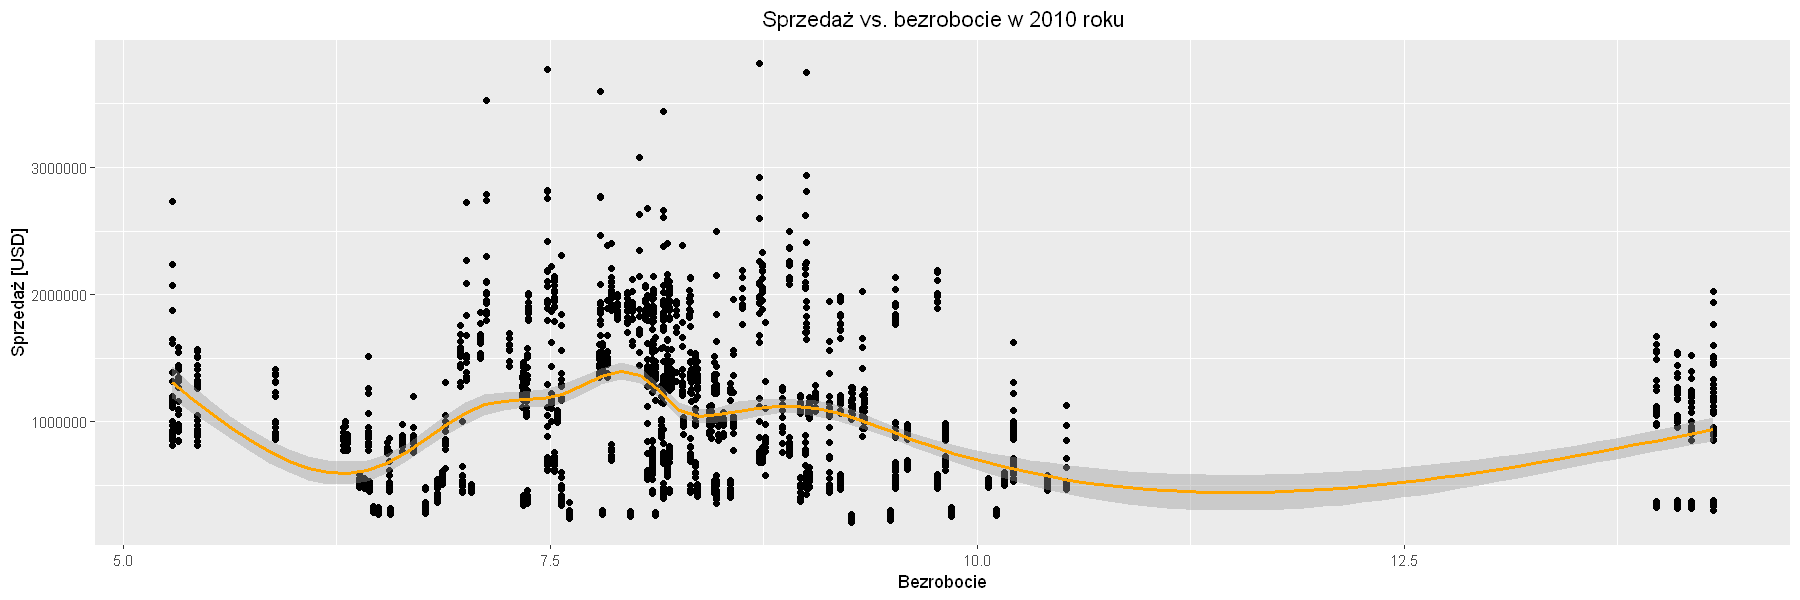

Korelacja sprzedaży do bezrobocia w 2011 roku wyniosła: -0.1409467

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



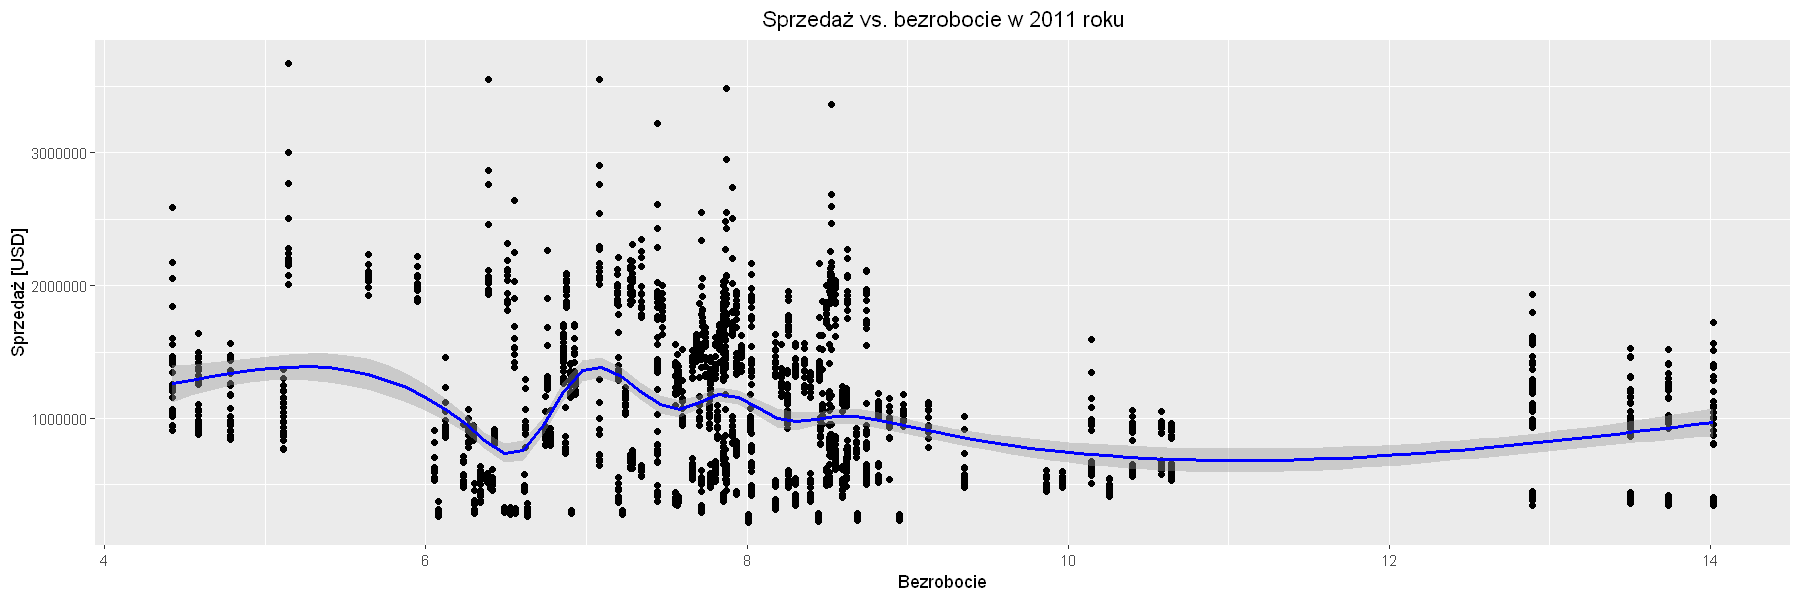

Korelacja sprzedaży do bezrobocia w 2012 roku wyniosła: -0.1150176

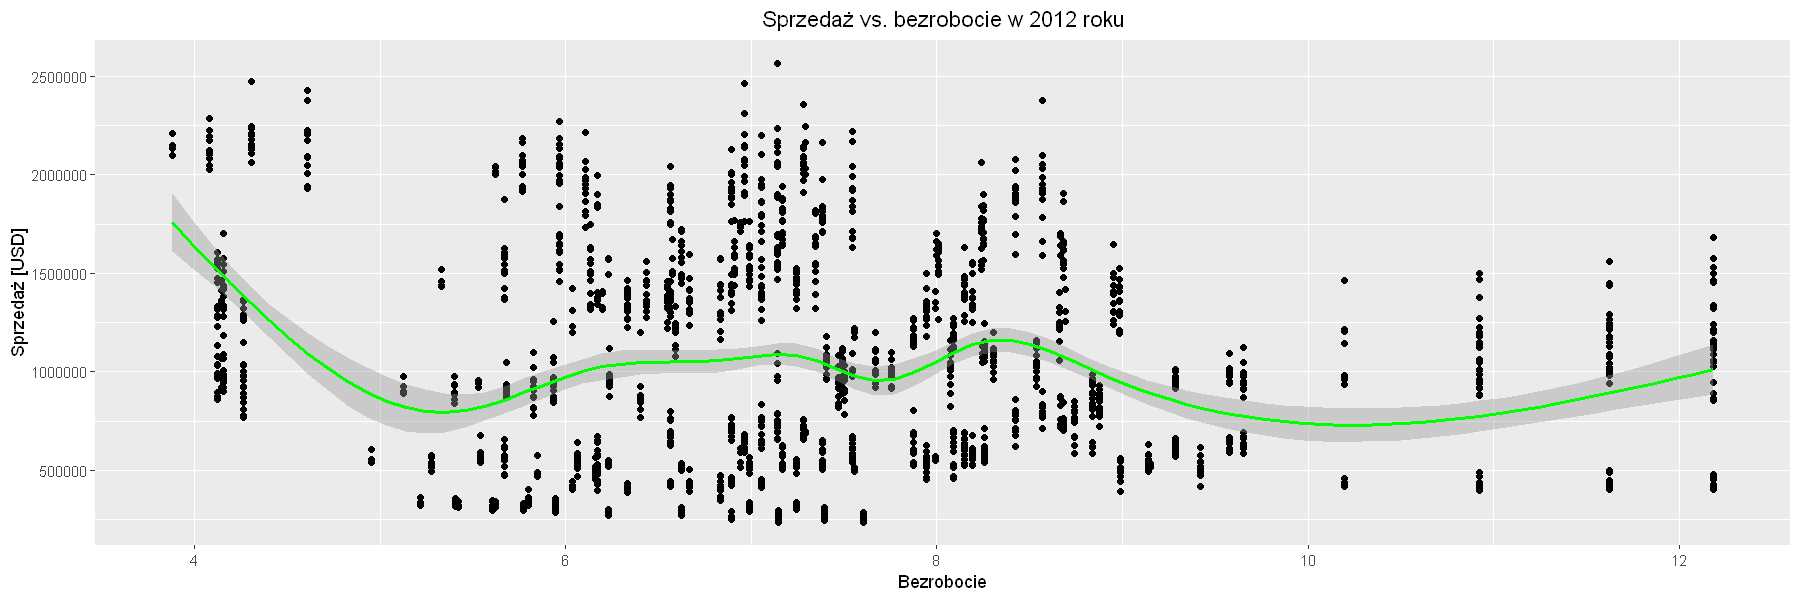

In [15]:
y2010_df <- dane %>%
  filter(Date >= "2010-01-01", Date <= "2010-12-31")

y2011_df <- dane %>%
  filter(Date >= "2011-01-01", Date <= "2011-12-31")

y2012_df <- dane %>%
  filter(Date >= "2012-01-01", Date <= "2012-12-31")


options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(y2010_df,aes(x=Unemployment,y=Weekly_Sales)) + 
geom_point() + 
geom_smooth(color="orange") +
ggtitle("Sprzedaż vs. bezrobocie w 2010 roku") + 
xlab("Bezrobocie") +
ylab("Sprzedaż [USD]") +
theme(plot.title = element_text(hjust = 0.5))
cat("Korelacja sprzedaży do bezrobocia w 2010 roku wyniosła:", cor(y2010_df$Weekly_Sales,y2010_df$Unemployment))


options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(y2011_df,aes(x=Unemployment,y=Weekly_Sales)) + 
geom_point() + 
geom_smooth(color="blue") +
ggtitle("Sprzedaż vs. bezrobocie w 2011 roku") + 
xlab("Bezrobocie") +
ylab("Sprzedaż [USD]") +
theme(plot.title = element_text(hjust = 0.5))
cat("Korelacja sprzedaży do bezrobocia w 2011 roku wyniosła:", cor(y2011_df$Weekly_Sales,y2011_df$Unemployment))


options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(y2012_df,aes(x=Unemployment,y=Weekly_Sales)) + 
geom_point() + 
geom_smooth(color="green") +
ggtitle("Sprzedaż vs. bezrobocie w 2012 roku") + 
xlab("Bezrobocie") +
ylab("Sprzedaż [USD]") +
theme(plot.title = element_text(hjust = 0.5))
cat("Korelacja sprzedaży do bezrobocia w 2012 roku wyniosła:", cor(y2012_df$Weekly_Sales,y2012_df$Unemployment))

# ---------------------------------------------------------------------------------------------------------------

Nie stwierdzono korelacji pomiędzy CPI, a wielkością sprzedaży w sklepach.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



Korelacja sprzedaży do CPI w 2010 roku wyniosła: -0.08165629

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



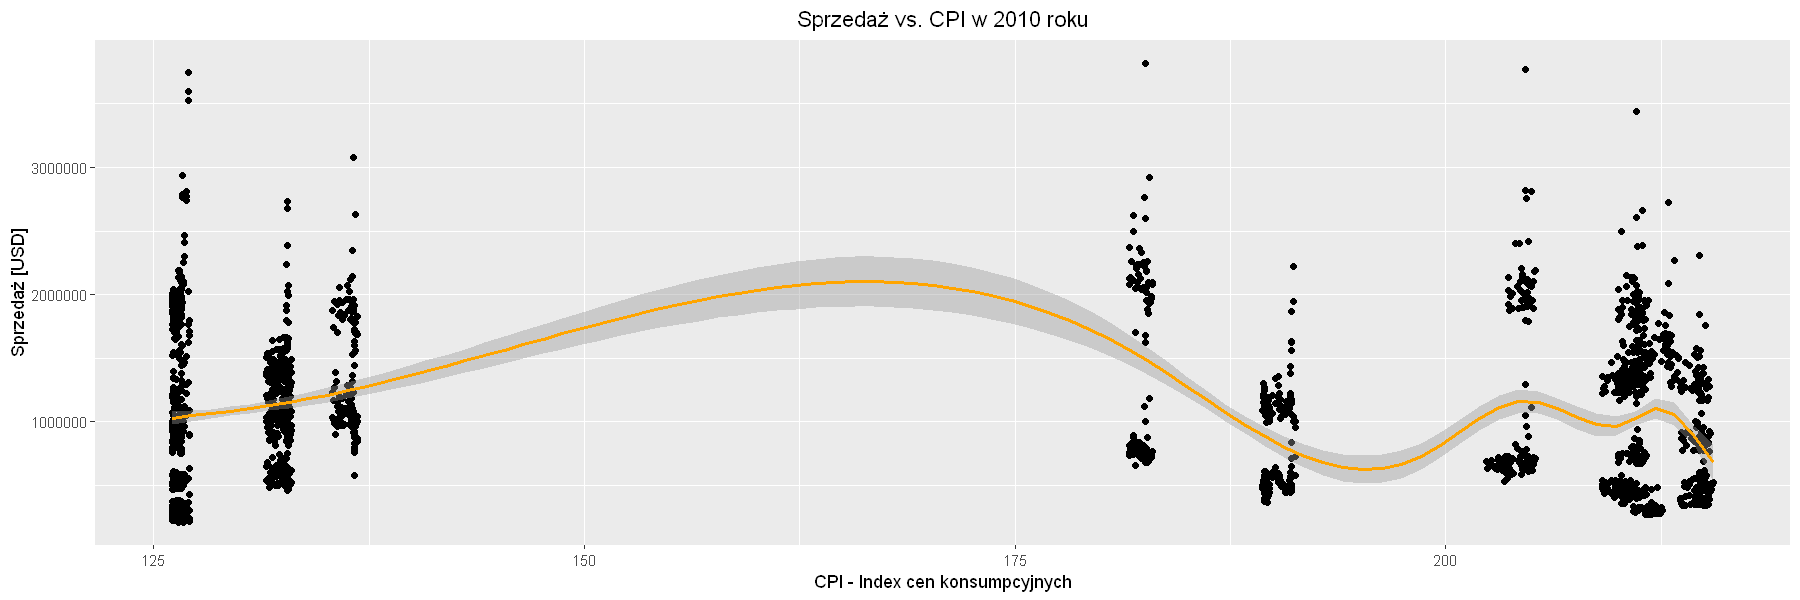

Korelacja sprzedaży do CPI w 2011 roku wyniosła: -0.06474342

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



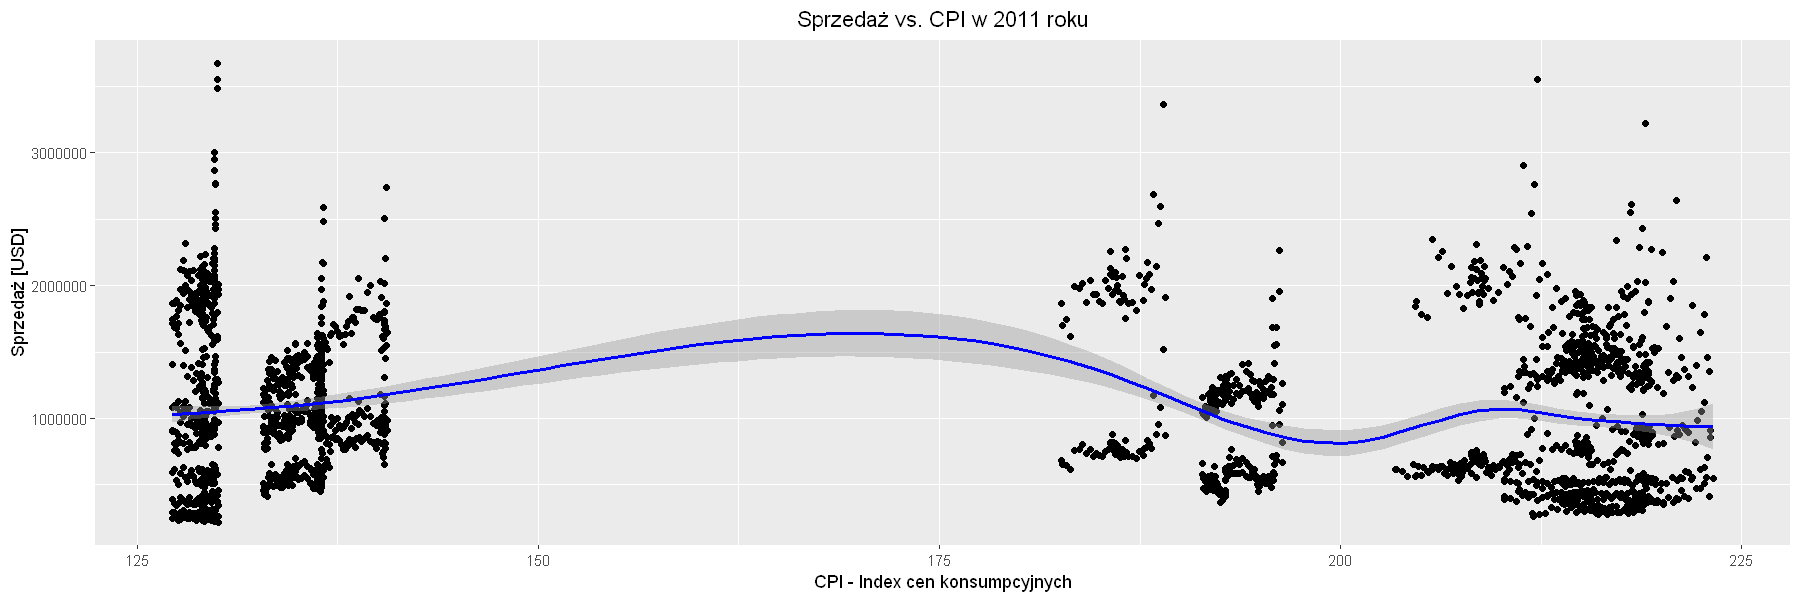

Korelacja sprzedaży do CPI w 2012 roku wyniosła: -0.068578

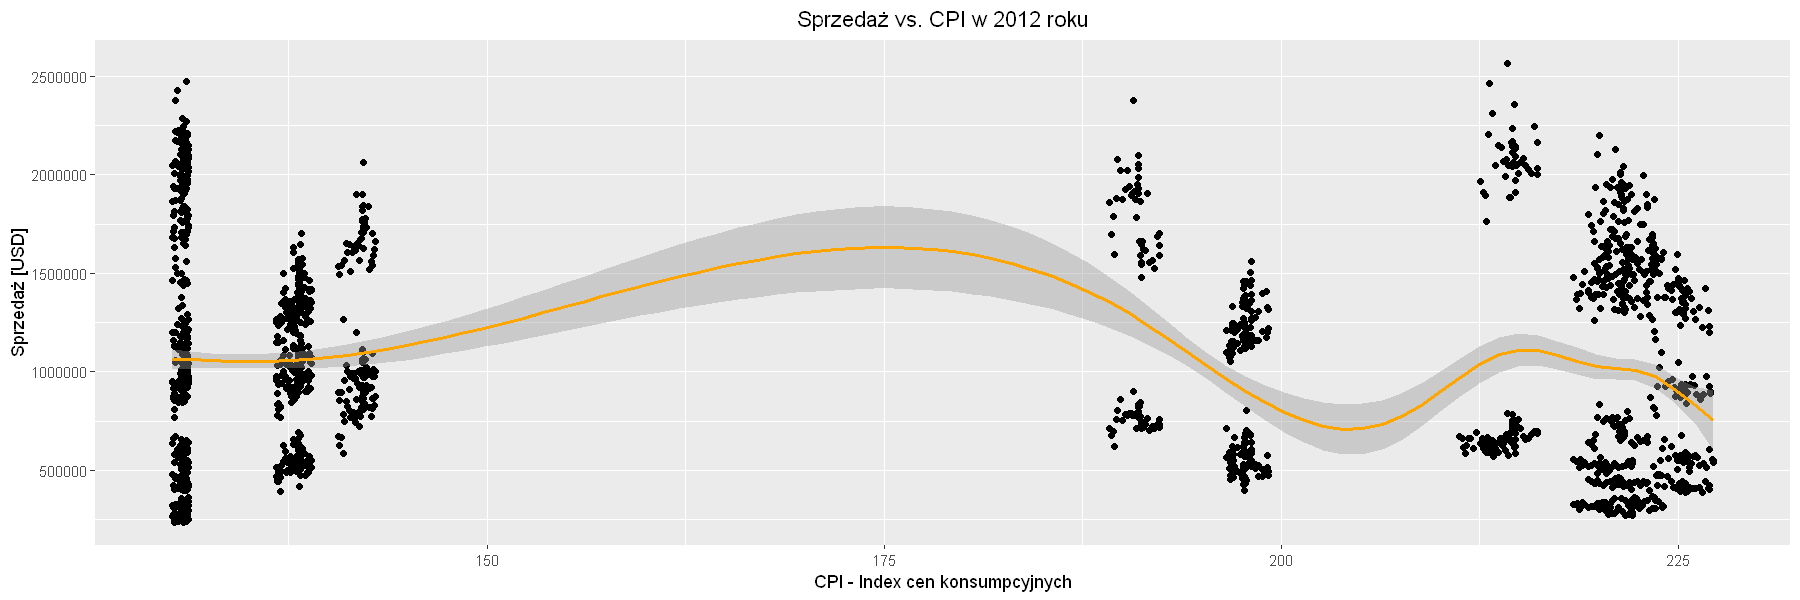

In [16]:
y2010_df <- dane %>%
  filter(Date >= "2010-01-01", Date <= "2010-12-31")

y2011_df <- dane %>%
  filter(Date >= "2011-01-01", Date <= "2011-12-31")

y2012_df <- dane %>%
  filter(Date >= "2012-01-01", Date <= "2012-12-31")


options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(y2010_df,aes(x=CPI,y=Weekly_Sales)) + 
geom_point() + 
geom_smooth(color="orange") +
ggtitle("Sprzedaż vs. CPI w 2010 roku") + 
xlab("CPI - Index cen konsumpcyjnych") +
ylab("Sprzedaż [USD]") +
theme(plot.title = element_text(hjust = 0.5))
cat("Korelacja sprzedaży do CPI w 2010 roku wyniosła:", cor(y2010_df$Weekly_Sales,y2010_df$CPI))


options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(y2011_df,aes(x=CPI,y=Weekly_Sales)) + 
geom_point() + 
geom_smooth(color="blue") +
ggtitle("Sprzedaż vs. CPI w 2011 roku") + 
xlab("CPI - Index cen konsumpcyjnych") +
ylab("Sprzedaż [USD]") +
theme(plot.title = element_text(hjust = 0.5))
cat("Korelacja sprzedaży do CPI w 2011 roku wyniosła:", cor(y2011_df$Weekly_Sales,y2011_df$CPI))


options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(y2012_df,aes(x=CPI,y=Weekly_Sales)) + 
geom_point() + 
geom_smooth(color="orange") +
ggtitle("Sprzedaż vs. CPI w 2012 roku") + 
xlab("CPI - Index cen konsumpcyjnych") +
ylab("Sprzedaż [USD]") +
theme(plot.title = element_text(hjust = 0.5))
cat("Korelacja sprzedaży do CPI w 2012 roku wyniosła:", cor(y2012_df$Weekly_Sales,y2012_df$CPI))

# ---------------------------------------------------------------------------------------------------------------

W roku 2010 mozna zaobserować bardzo słabą korelację kosztów paliwa do wielkości sprzedaży, natomiast w następnych latach korelacja niemal nie występuje.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



Korelacja sprzedaży do kosztów paliwa w 2010 roku wyniosła: 0.1279489

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



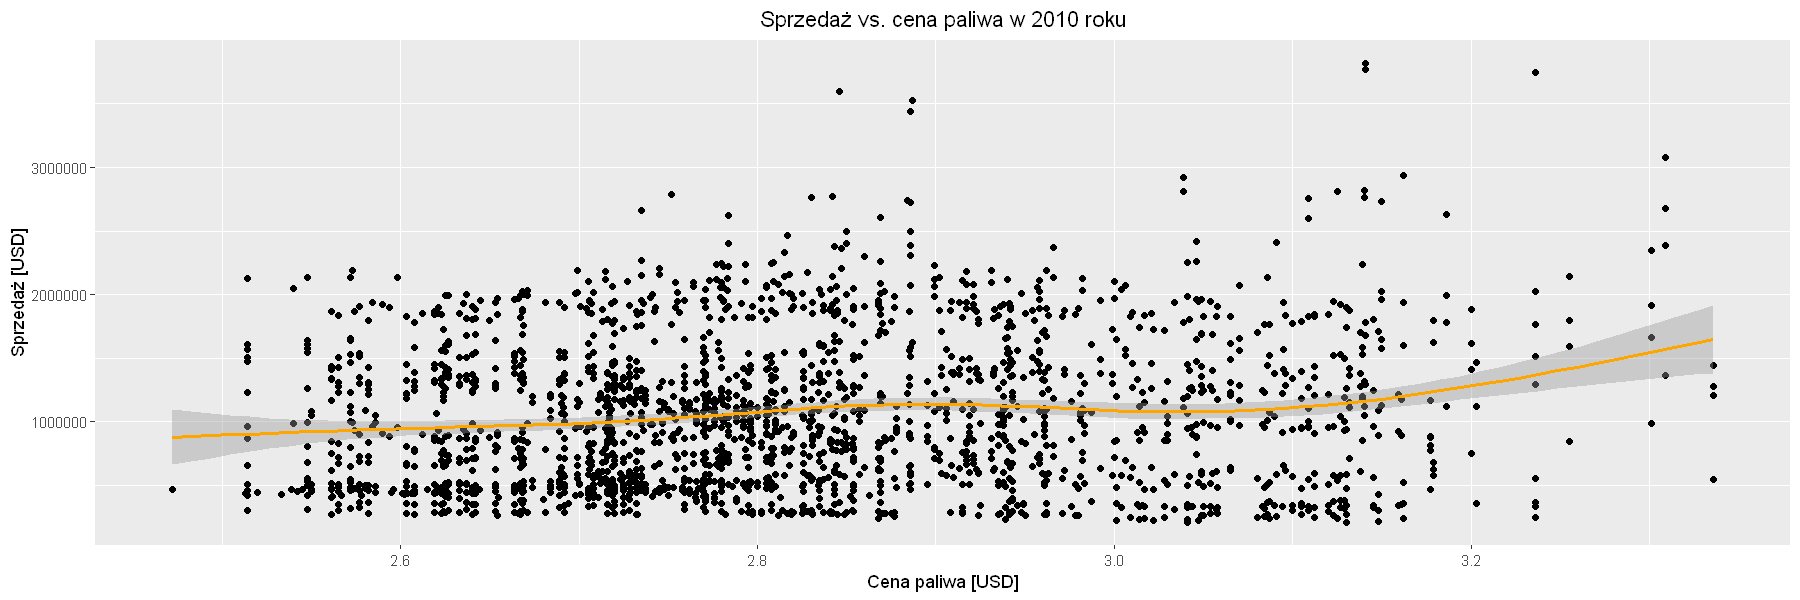

Korelacja sprzedaży do kosztów paliwa w 2011 roku wyniosła: 0.01635925

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



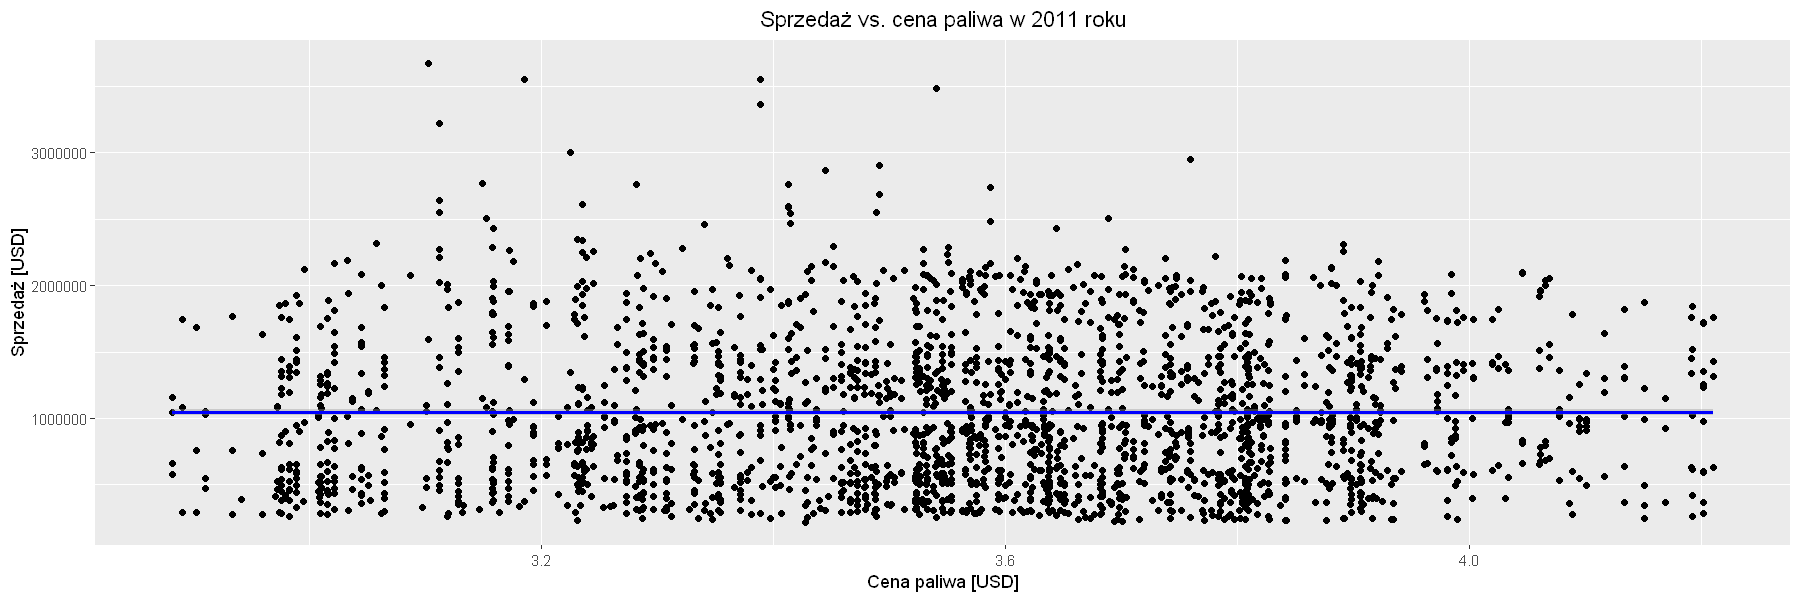

Korelacja sprzedaży do kosztów paliwa w 2012 roku wyniosła: 0.02375315

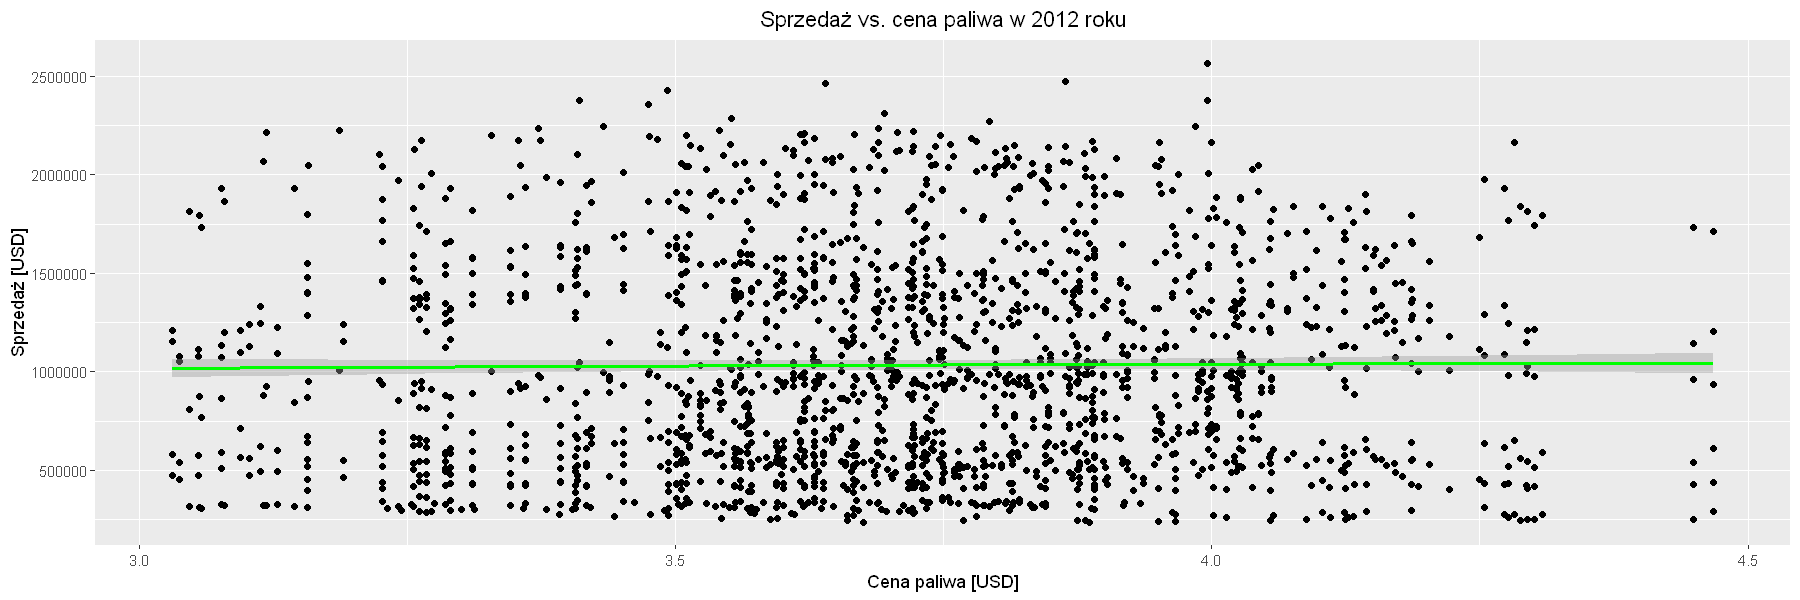

In [17]:
y2010_df <- dane %>%
  filter(Date >= "2010-01-01", Date <= "2010-12-31")

y2011_df <- dane %>%
  filter(Date >= "2011-01-01", Date <= "2011-12-31")

y2012_df <- dane %>%
  filter(Date >= "2012-01-01", Date <= "2012-12-31")


options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(y2010_df,aes(x=Fuel_Price,y=Weekly_Sales)) + 
geom_point() + 
geom_smooth(color="orange") +
ggtitle("Sprzedaż vs. cena paliwa w 2010 roku") + 
xlab("Cena paliwa [USD]") +
ylab("Sprzedaż [USD]") +
theme(plot.title = element_text(hjust = 0.5))
cat("Korelacja sprzedaży do kosztów paliwa w 2010 roku wyniosła:", cor(y2010_df$Weekly_Sales,y2010_df$Fuel_Price))


options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(y2011_df,aes(x=Fuel_Price,y=Weekly_Sales)) + 
geom_point() + 
geom_smooth(color="blue") +
ggtitle("Sprzedaż vs. cena paliwa w 2011 roku") + 
xlab("Cena paliwa [USD]") +
ylab("Sprzedaż [USD]") +
theme(plot.title = element_text(hjust = 0.5))
cat("Korelacja sprzedaży do kosztów paliwa w 2011 roku wyniosła:", cor(y2011_df$Weekly_Sales,y2011_df$Fuel_Price))


options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(y2012_df,aes(x=Fuel_Price,y=Weekly_Sales)) + 
geom_point() + 
geom_smooth(color="green") +
ggtitle("Sprzedaż vs. cena paliwa w 2012 roku") + 
xlab("Cena paliwa [USD]") +
ylab("Sprzedaż [USD]") +
theme(plot.title = element_text(hjust = 0.5))
cat("Korelacja sprzedaży do kosztów paliwa w 2012 roku wyniosła:", cor(y2012_df$Weekly_Sales,y2012_df$Fuel_Price))

---------------------------------------------------------------------------------------------------------------

# ---------------------------------------------------------------------------------------------------------------

## Aby potwierdzić powyższe analizę przeprowadzimy kilka testów statystycznych.

#### W tym celu najpierw wytypujemy próbkę z całej populacji. Będą to dane ze sklepu nr 22.

In [18]:
sklep22 <- dane %>%
  filter(Store==22)

### Korelacja cech ilościowych

##### Test istotności wspołczynnika korelacji dla temperatury oraz wielkości sprzedaży.

H0: r=0

H1: r=1

alfa=0,05

In [19]:
cor.test(sklep22$Weekly_Sales,sklep22$Temperature)


	Pearson's product-moment correlation

data:  sklep22$Weekly_Sales and sklep22$Temperature
t = -0.98769, df = 141, p-value = 0.325
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.24372422  0.08237754
sample estimates:
        cor 
-0.08289191 


In [20]:
cor(dane$Weekly_Sales,dane$Temperature)

[1] -0.06381001

##### Odrzucamy hipotezę zerową. Między wielkością sprzedaży, a temperaturą występuje bardzo słaba, ale jednak zależność.
W dodatku potwiedziliśmy, że wynik przeprowadzony dla próby, zawiera się w wyniku korelacji dla całej populacji.

# ---------------------------------------------------------------------------------------------------------------

##### Test istotności wspołczynnika korelacji dla bezrobocia oraz wielkości sprzedaży.

H0: r=0

H1: r=1

alfa=0,05

In [21]:
cor.test(sklep22$Weekly_Sales,sklep22$Unemployment)


	Pearson's product-moment correlation

data:  sklep22$Weekly_Sales and sklep22$Unemployment
t = 0.46396, df = 141, p-value = 0.6434
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1259127  0.2018975
sample estimates:
       cor 
0.03904287 


In [22]:
cor(dane$Weekly_Sales,dane$Unemployment)

[1] -0.1061761

##### Odrzucamy hipotezę zerową. Między wielkością sprzedaży, a bezrobociem występuje bardzo słaba, ale jednak zależność.
W dodatku potwiedziliśmy, że wynik przeprowadzony dla próby, zawiera się w wyniku korelacji dla całej populacji.

# ---------------------------------------------------------------------------------------------------------------

##### Test istotności wspołczynnika korelacji dla indesku cen konsumpcyjnych (CPI) oraz wielkości sprzedaży.

H0: r=0

H1: r=1

alfa=0,05

In [23]:
cor.test(sklep22$Weekly_Sales,sklep22$CPI)


	Pearson's product-moment correlation

data:  sklep22$Weekly_Sales and sklep22$CPI
t = -0.45872, df = 141, p-value = 0.6471
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2014742  0.1263469
sample estimates:
        cor 
-0.03860229 


In [24]:
cor(dane$Weekly_Sales,dane$CPI)

[1] -0.07263416

##### Odrzucamy hipotezę zerową. Między wielkością sprzedaży, a indeksem cen konsumpcyjnych występuje bardzo słaba, ale jednak zależność.
W dodatku potwiedziliśmy, że wynik przeprowadzony dla próby, zawiera się w wyniku korelacji dla całej populacji.

# ---------------------------------------------------------------------------------------------------------------

##### Test istotności wspołczynnika korelacji dla cen paliwa oraz wielkości sprzedaży.

H0: r=0

H1: r=1

alfa=0,05

In [25]:
cor.test(sklep22$Weekly_Sales,sklep22$Fuel_Price)


	Pearson's product-moment correlation

data:  sklep22$Weekly_Sales and sklep22$Fuel_Price
t = -0.89184, df = 141, p-value = 0.374
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.23614112  0.09036383
sample estimates:
        cor 
-0.07489568 


In [26]:
cor(dane$Weekly_Sales,dane$Fuel_Price)

[1] 0.009463786

##### Odrzucamy hipotezę zerową. Między wielkością sprzedaży, a ceną paliwa występuje bardzo słaba, ale jednak zależność.
W dodatku potwiedziliśmy, że wynik przeprowadzony dla próby, zawiera się w wyniku korelacji dla całej populacji.

# ---------------------------------------------------------------------------------------------------------------

##### Test istotności wspołczynnika korelacji dla cen paliwa oraz temperatury.

H0: r=0

H1: r=1

alfa=0,05

In [27]:
cor.test(sklep22$Fuel_Price,sklep22$Temperature)


	Pearson's product-moment correlation

data:  sklep22$Fuel_Price and sklep22$Temperature
t = 1.7023, df = 141, p-value = 0.09091
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.0227714  0.2990892
sample estimates:
      cor 
0.1419076 


In [28]:
cor(dane$Fuel_Price,dane$Temperature)

[1] 0.1449818

##### Odrzucamy hipotezę zerową. Między ceną paliwa, a ceną temperaturą występuje słaba, ale jednak zależność.
W dodatku potwiedziliśmy, że wynik przeprowadzony dla próby, zawiera się w wyniku korelacji dla całej populacji.

# ---------------------------------------------------------------------------------------------------------------

##### Test istotności wspołczynnika korelacji dla cen paliwa oraz bezrobocia.

H0: r=0

H1: r=1

alfa=0,05

In [29]:
cor.test(sklep22$Fuel_Price,sklep22$Unemployment)


	Pearson's product-moment correlation

data:  sklep22$Fuel_Price and sklep22$Unemployment
t = -10.999, df = 141, p-value < 0.00000000000000022
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7590331 -0.5801147
sample estimates:
       cor 
-0.6795528 


In [30]:
cor(dane$Fuel_Price,dane$Unemployment)

[1] -0.03468374

##### Odrzucamy hipotezę zerową. Między ceną paliwa, a ceną bezrobociej występuje dość silna korelacja.
Co ciekawe, w tym przypadku podjelibyśmy złą decyzję ponieważ korelacja dla całej populacji nie zawiera się w teście z próby.

# ---------------------------------------------------------------------------------------------------------------

##### Test t dla średniej wiekości sprzedaży

H0: średnia tygodniowa sprzedaż = 1000000 

H1: średnia tygodniowa sprzedaż =/= 1000000 

alfa=0,05

In [31]:
t.test(sklep22$Weekly_Sales, mu=1000000)


	One Sample t-test

data:  sklep22$Weekly_Sales
t = 2.1136, df = 142, p-value = 0.0363
alternative hypothesis: true mean is not equal to 1000000
95 percent confidence interval:
 1001845 1055157
sample estimates:
mean of x 
  1028501 


In [32]:
mean(dane$Weekly_Sales)

[1] 1046965

##### Odrzucamy hipotezę zerową. Średnia tygodniowa sprzedaż jest wyższa niż zadeklarowano.
W dodatku potwiedziliśmy, że wynik przeprowadzony dla próby, zawiera się w wyniku korelacji dla całej populacji.

# ---------------------------------------------------------------------------------------------------------------

##### Test t dla średniej wskaźnika bezrobocia.

H0: średni wskaźnik bezrobocia = 8%

H1: średni wskaźnik bezrobocia =/= 8%

alfa=0,05

In [33]:
t.test(sklep22$Unemployment, mu=8)


	One Sample t-test

data:  sklep22$Unemployment
t = 2.2522, df = 142, p-value = 0.02585
alternative hypothesis: true mean is not equal to 8
95 percent confidence interval:
 8.008481 8.130260
sample estimates:
mean of x 
 8.069371 


In [34]:
mean(dane$Unemployment)

[1] 7.999151

##### Odrzucamy hipotezę zerową. Średnia tygodniowa sprzedaż jest wyższa niż zadeklarowano.
Co ciekawe, w tym przypadku podjelibyśmy złą decyzję ponieważ średani wskaźnik bezrobocia dla całej populacji nie zawiera się w teście z próby.

# ---------------------------------------------------------------------------------------------------------------

##### Test t dla średniej ceny paliwa.

H0: średnia cena paliwa wynosi = 3,5 USD

H1: średnia cena paliwa =/= 3,5 USD

alfa=0,05

In [35]:
t.test(sklep22$Fuel_Price, mu=3.5)


	One Sample t-test

data:  sklep22$Fuel_Price
t = -1.5305, df = 142, p-value = 0.1281
alternative hypothesis: true mean is not equal to 3.5
95 percent confidence interval:
 3.366492 3.516991
sample estimates:
mean of x 
 3.441741 


In [36]:
mean(dane$Fuel_Price)

[1] 3.358607

##### Odrzucamy hipotezę zerową. Średnia tygodniowa sprzedaż jest niższa niż zadeklarowano.
Co ciekawe, w tym przypadku podjelibyśmy złą decyzję ponieważ średani wskaźnik bezrobocia dla całej populacji nie zawiera się w teście z próby.

# ---------------------------------------------------------------------------------------------------------------

##### Test t dla dwóch średnich wielkości sprzedaży w sklepach.

H0: średnia suma sprzedaży jest taka sama w dni powszednie oraz w święta.

H1: średnie te są różne.

alfa=0,05

In [37]:
t.test(sklep22$Weekly_Sales ~ sklep22$Holiday_Flag)


	Welch Two Sample t-test

data:  sklep22$Weekly_Sales by sklep22$Holiday_Flag
t = -0.73726, df = 9.4832, p-value = 0.4788
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -245155.7  123931.2
sample estimates:
mean in group 0 mean in group 1 
        1024262         1084875 


In [38]:
dane %>%
  filter(Holiday_Flag == 0) %>%
  summarise(srednia_zwykly_dzien=mean(Weekly_Sales))

dane %>%
  filter(Holiday_Flag == 1) %>%
  summarise(srednia_swieto=mean(Weekly_Sales))


srednia_zwykly_dzien
<dbl>
1041256


srednia_swieto
<dbl>
1122888


##### Odrzucamy hipotezę zerową. Średnia tygodniowa sprzedaż jest różna w dla świąt oraz dni powszednich.
Co prawda zweryfikowaliśmy, że średnia dla zwykłych dni mieści się w zadanym przedziale ufności, natomiat średnie sprzedaży ze świąt wykrasza poza podany zakres.

# ---------------------------------------------------------------------------------------------------------------

##### Test normalności rozkładu (zgodności z określonym rozkładem teoretycznym.) - Shapiro-Wilka.

H0: średnia suma tygodniowej sprzedaży ma rozkład normalny

H1: średnia suma tygodniowej sprzedaży nie posiada rozkładu normalnego.

alfa=0,05

In [39]:
shapiro.test(sklep22$Weekly_Sales)


	Shapiro-Wilk normality test

data:  sklep22$Weekly_Sales
W = 0.68661, p-value = 0.0000000000000004483


##### Odrzucamy hipotezę zerową. Rozkład tygodniowej sprzedaży nie jest rozkładem normalnym dla próbki populacji.

# ---------------------------------------------------------------------------------------------------------------

##### Test normalności rozkładu (zgodności z określonym rozkładem teoretycznym.) - Kołmogorowa-Smirnova.

H0: średnia suma tygodniowej sprzedaży ma rozkład normalny

H1: średnia suma tygodniowej sprzedaży nie posiada rozkładu normalnego.

alfa=0,05

In [40]:
ks.test(dane$Weekly_Sales, "pnorm", mean=mean(dane$Weekly_Sales), sd=sd(dane$Weekly_Sales))


	One-sample Kolmogorov-Smirnov test

data:  dane$Weekly_Sales
D = 0.082341, p-value < 0.00000000000000022
alternative hypothesis: two-sided


##### Odrzucamy hipotezę zerową. Rozkład tygodniowej sprzedaży nie jest rozkładem normalnym dla całego badanego zbioru.

# ---------------------------------------------------------------------------------------------------------------

# Wykresy kwantyl - kwantyl (q-q)

[1] "Rozkład poniższej cechy dla całej badanej populacji nie jest normalny"


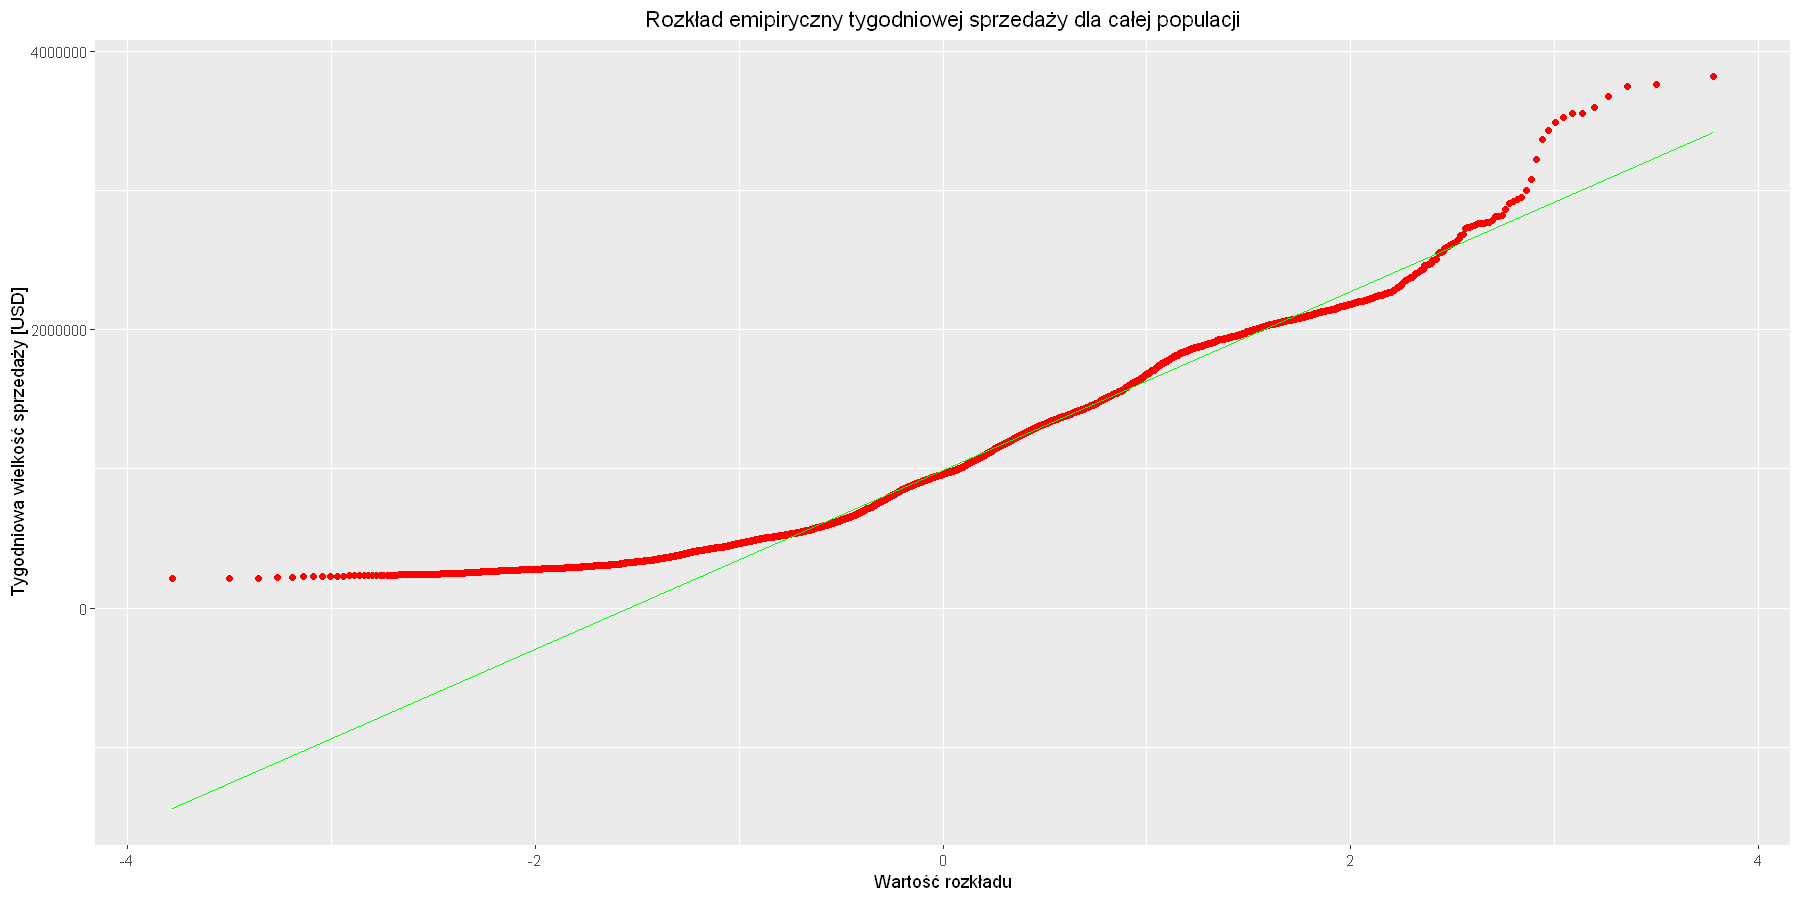

[1] "Rozkład poniższej cechy dla całej badanej populacji nie jest normalny"


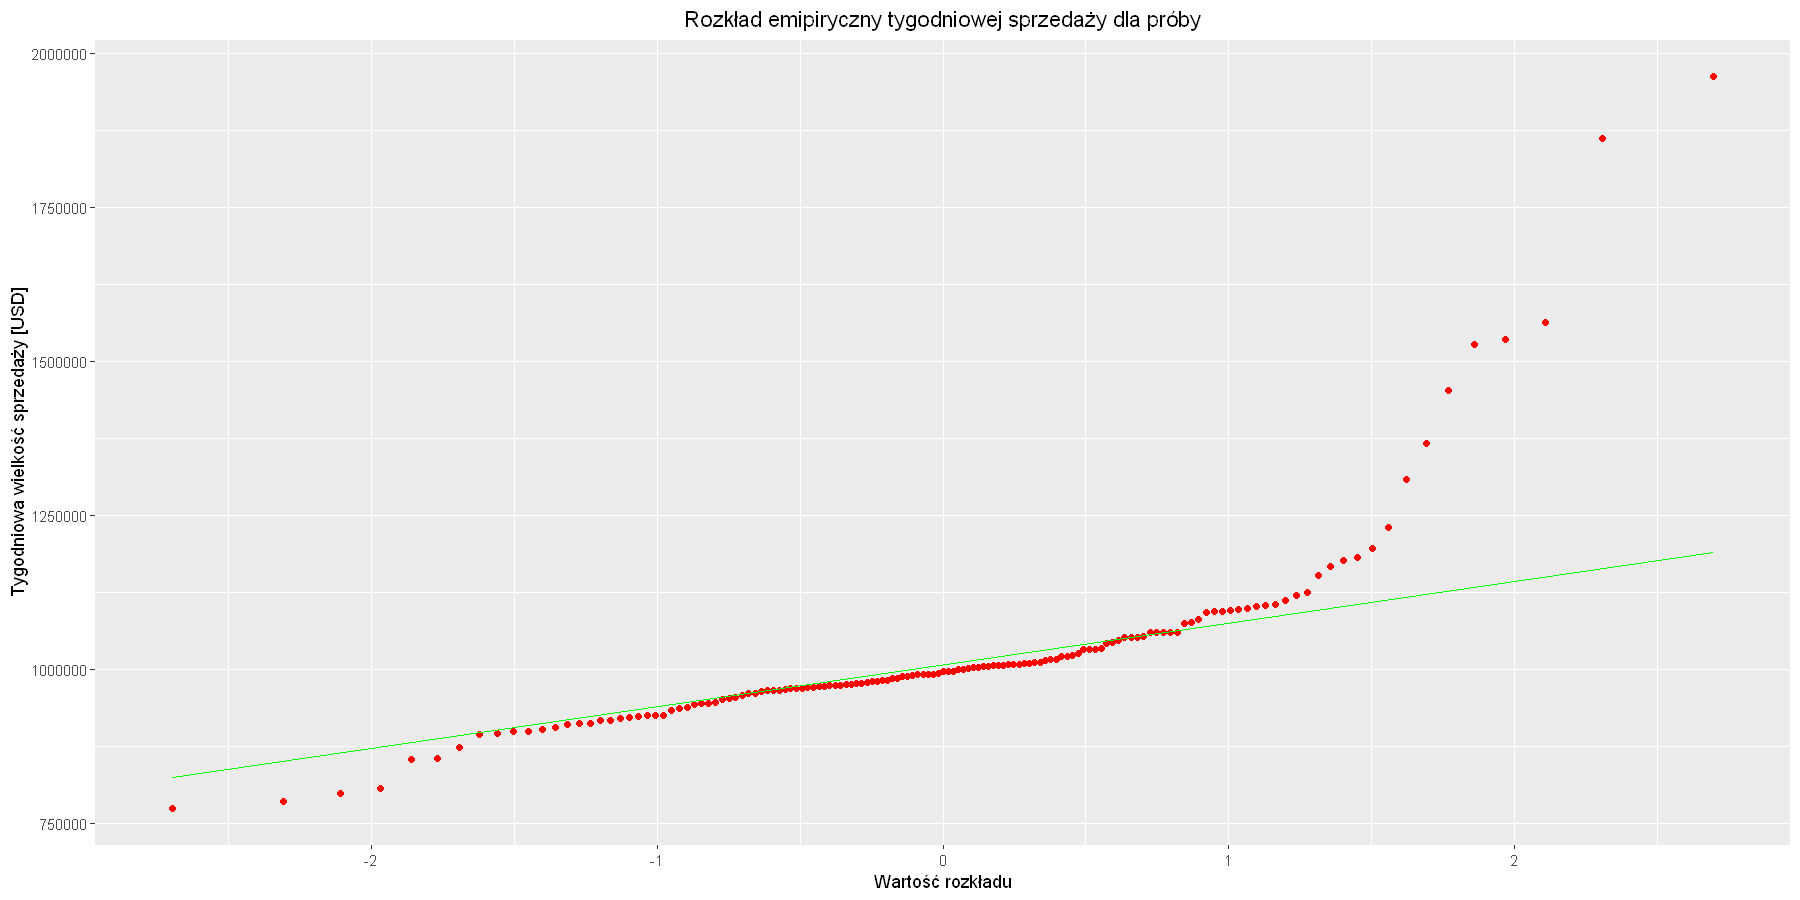

In [41]:
options(repr.plot.width = 15, repr.plot.height = 7.5)
ggplot(dane,aes(sample=Weekly_Sales))+
  stat_qq(color="red") +
  stat_qq_line(color="green")+
  xlab("Wartość rozkładu")+
  ylab("Tygodniowa wielkość sprzedaży [USD]") +
  ggtitle("Rozkład emipiryczny tygodniowej sprzedaży dla całej populacji") +
  theme(plot.title = element_text(hjust = 0.5))

print("Rozkład poniższej cechy dla całej badanej populacji nie jest normalny")


options(repr.plot.width = 15, repr.plot.height = 7.5)
ggplot(sklep22,aes(sample=Weekly_Sales))+
  stat_qq(color="red") +
  stat_qq_line(color="green")+
  xlab("Wartość rozkładu")+
  ylab("Tygodniowa wielkość sprzedaży [USD]") +
  ggtitle("Rozkład emipiryczny tygodniowej sprzedaży dla próby") +
  theme(plot.title = element_text(hjust = 0.5))

print("Rozkład poniższej cechy dla całej badanej populacji nie jest normalny")

# ---------------------------------------------------------------------------------------------------------------

[1] "Rozkład poniższej cechy dla całej badanej populacji nie jest normalny"


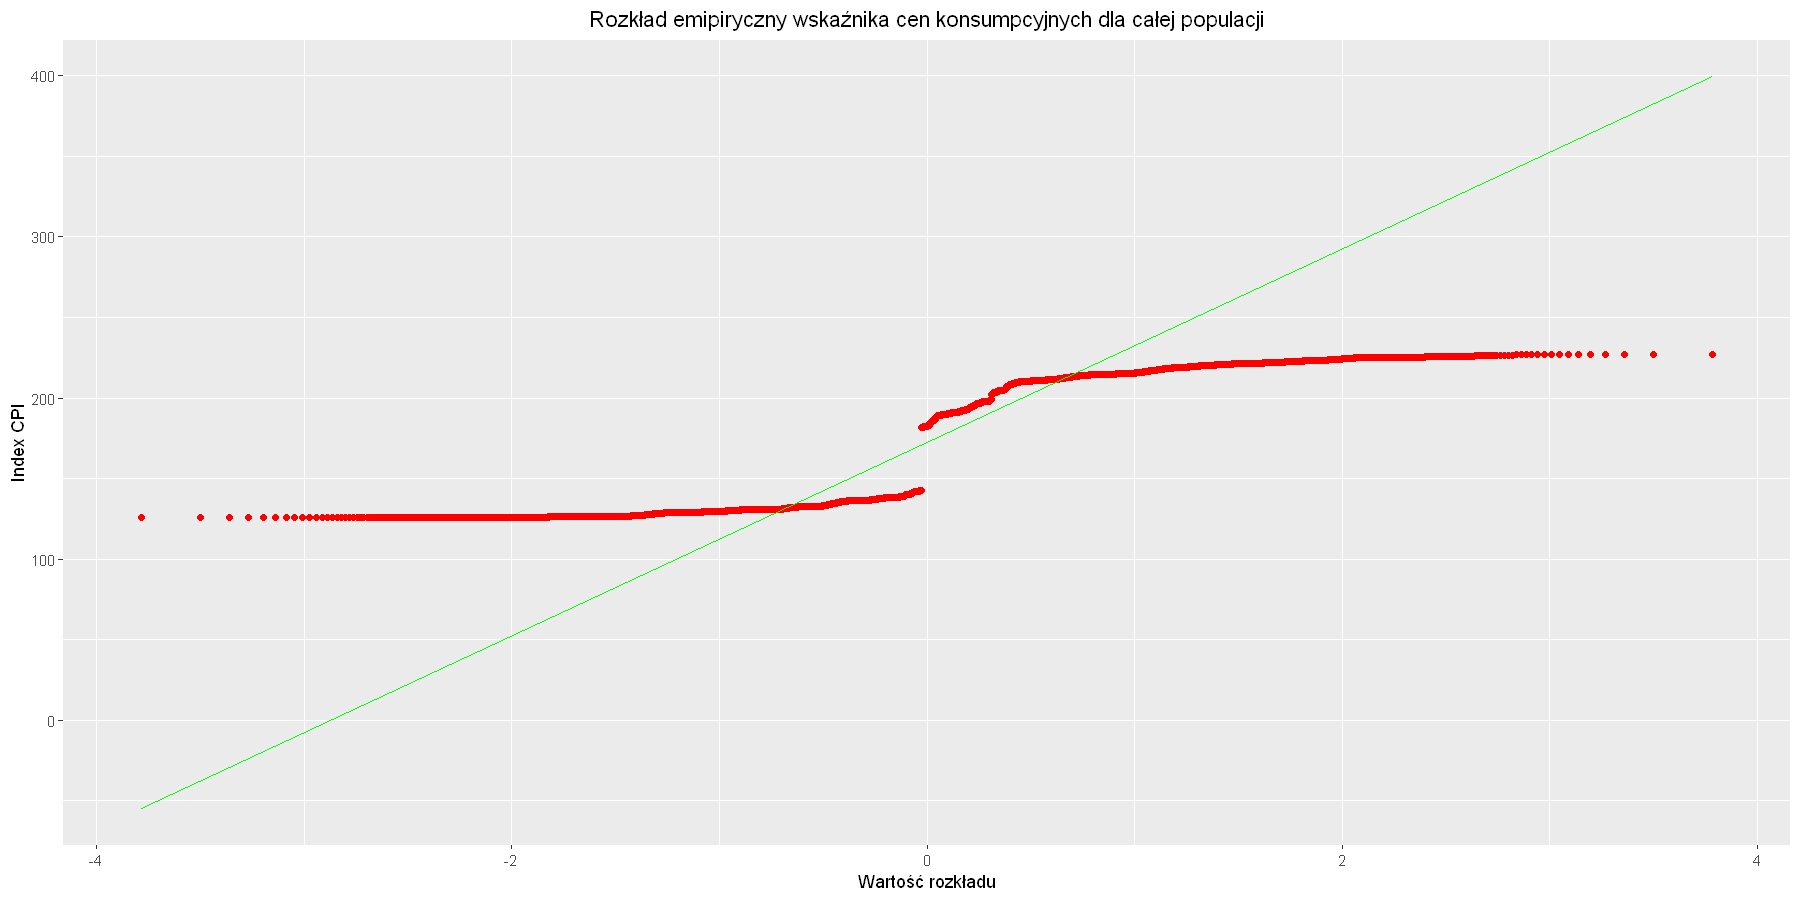

[1] "Rozkład poniższej cechy dla całej badanej populacji nie jest normalny"


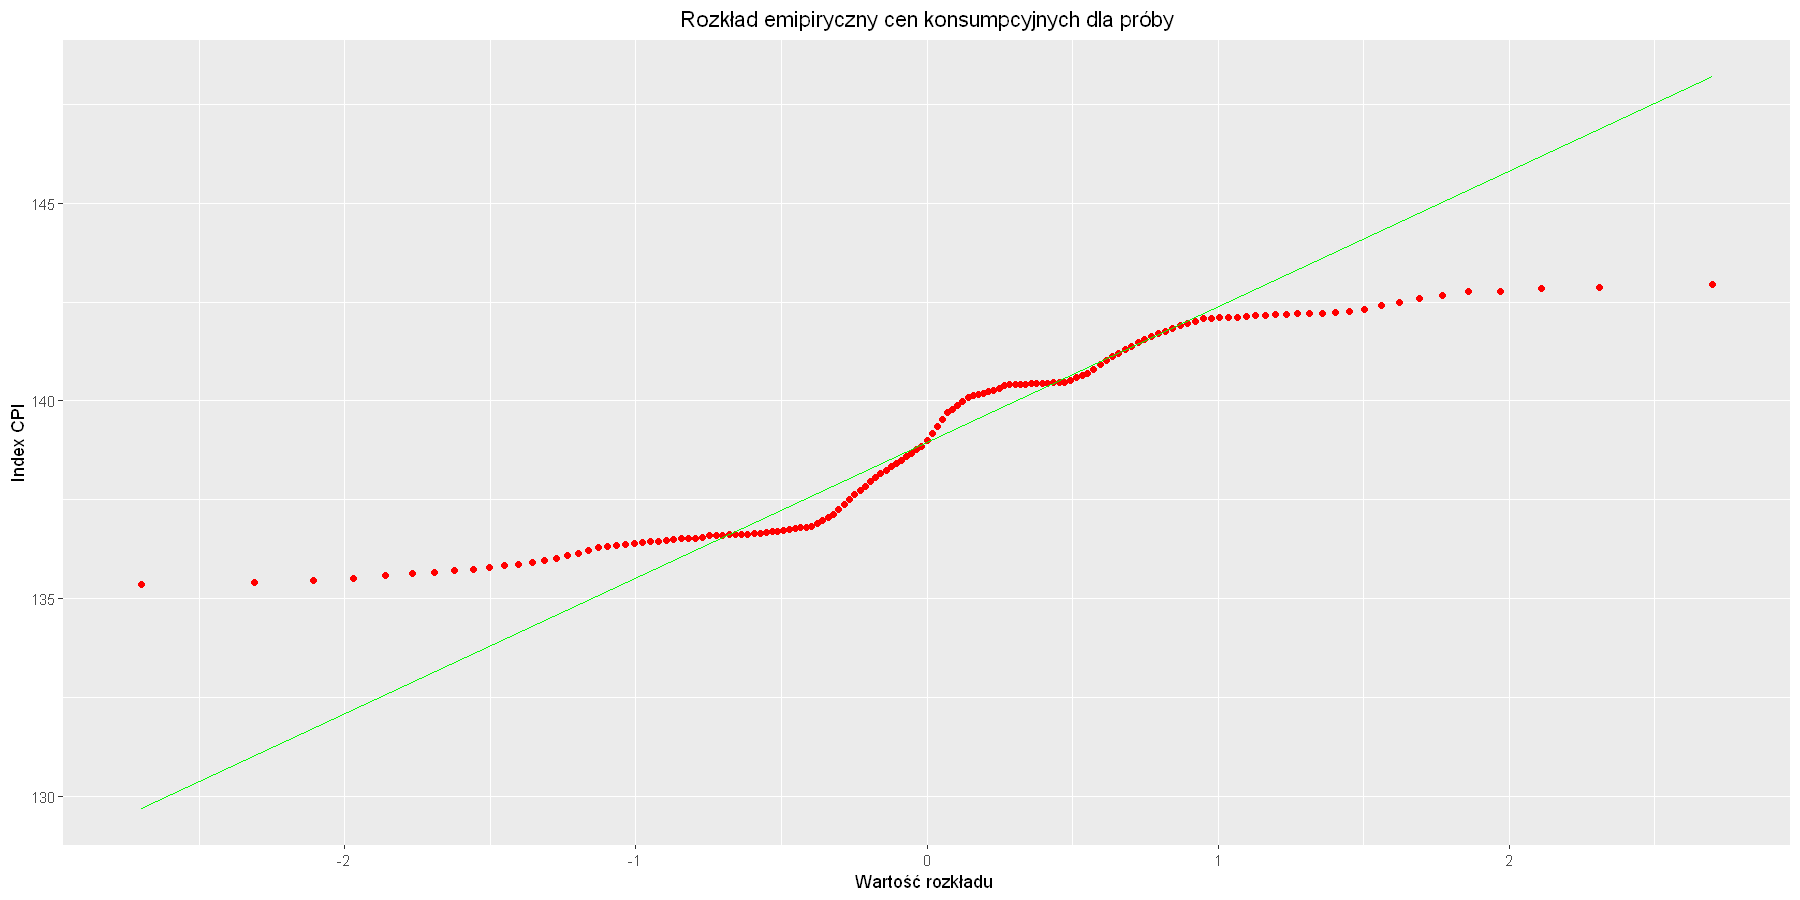

In [42]:
options(repr.plot.width = 15, repr.plot.height = 7.5)
ggplot(dane,aes(sample=CPI))+
  stat_qq(color="red") +
  stat_qq_line(color="green")+
  xlab("Wartość rozkładu")+
  ylab("Index CPI") +
  ggtitle("Rozkład emipiryczny wskaźnika cen konsumpcyjnych dla całej populacji") +
  theme(plot.title = element_text(hjust = 0.5))

print("Rozkład poniższej cechy dla całej badanej populacji nie jest normalny")


options(repr.plot.width = 15, repr.plot.height = 7.5)
ggplot(sklep22,aes(sample=CPI))+
  stat_qq(color="red") +
  stat_qq_line(color="green")+
  xlab("Wartość rozkładu ")+
  ylab("Index CPI") +
  ggtitle("Rozkład emipiryczny cen konsumpcyjnych dla próby") +
  theme(plot.title = element_text(hjust = 0.5))

print("Rozkład poniższej cechy dla całej badanej populacji nie jest normalny")

# ---------------------------------------------------------------------------------------------------------------

[1] "Rozkład poniższej cechy dla całej badanej populacji nie jest normalny"


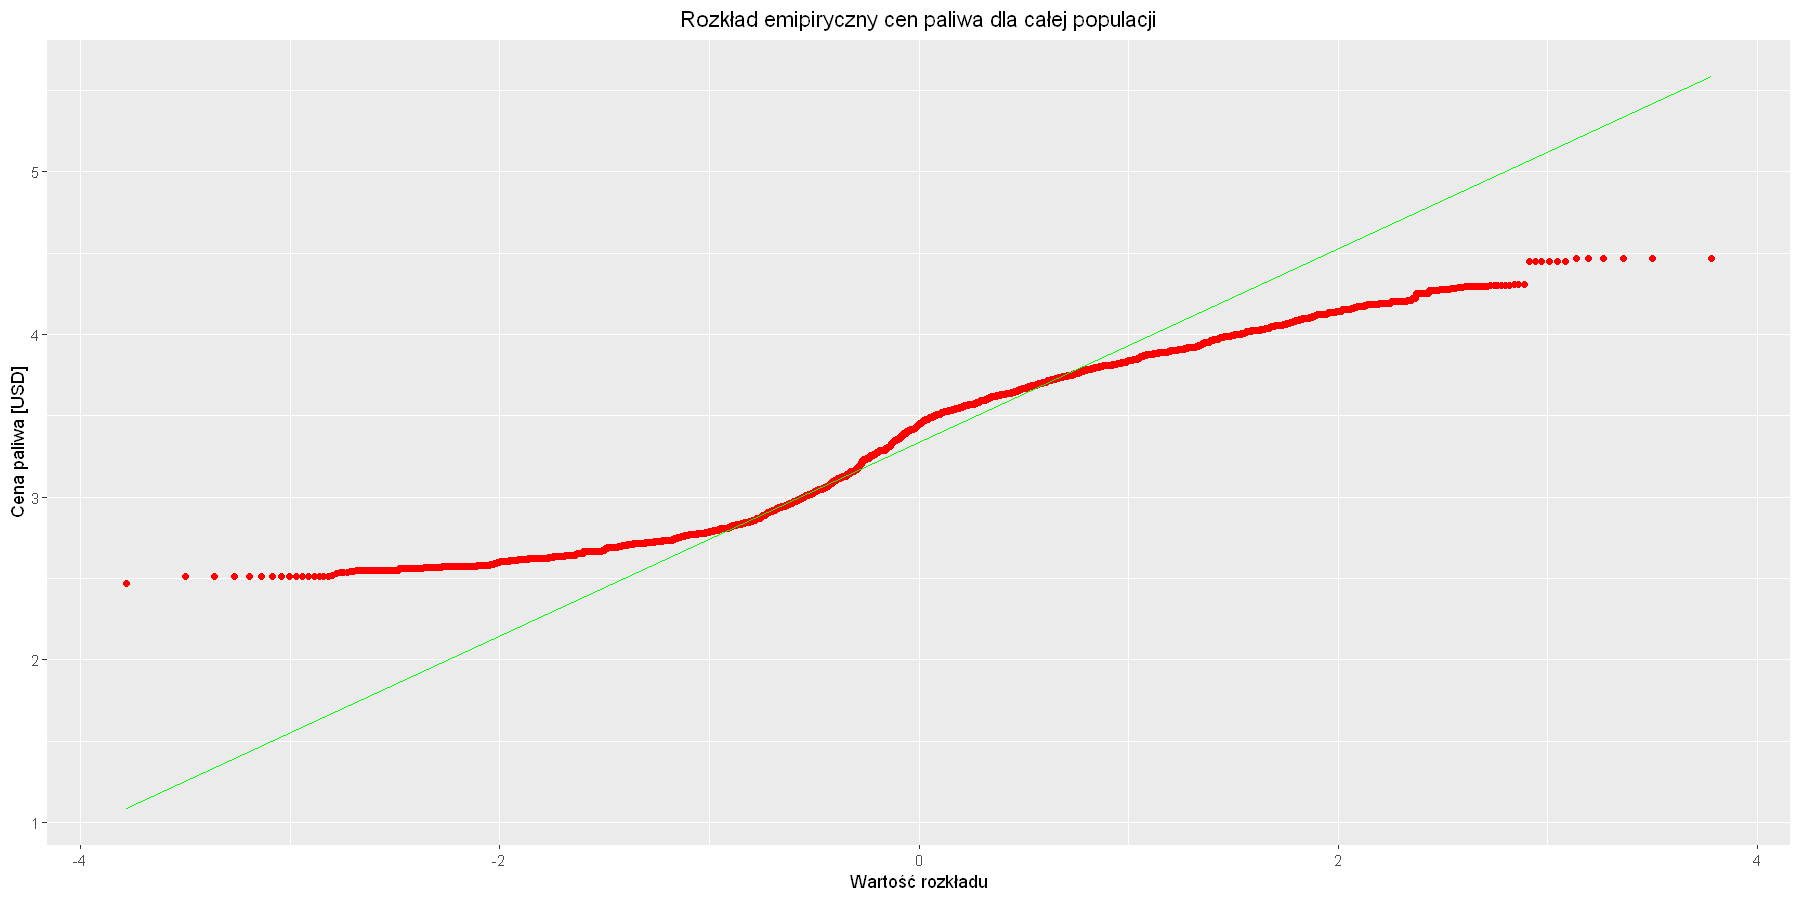

[1] "Rozkład poniższej cechy dla całej badanej populacji nie jest normalny"


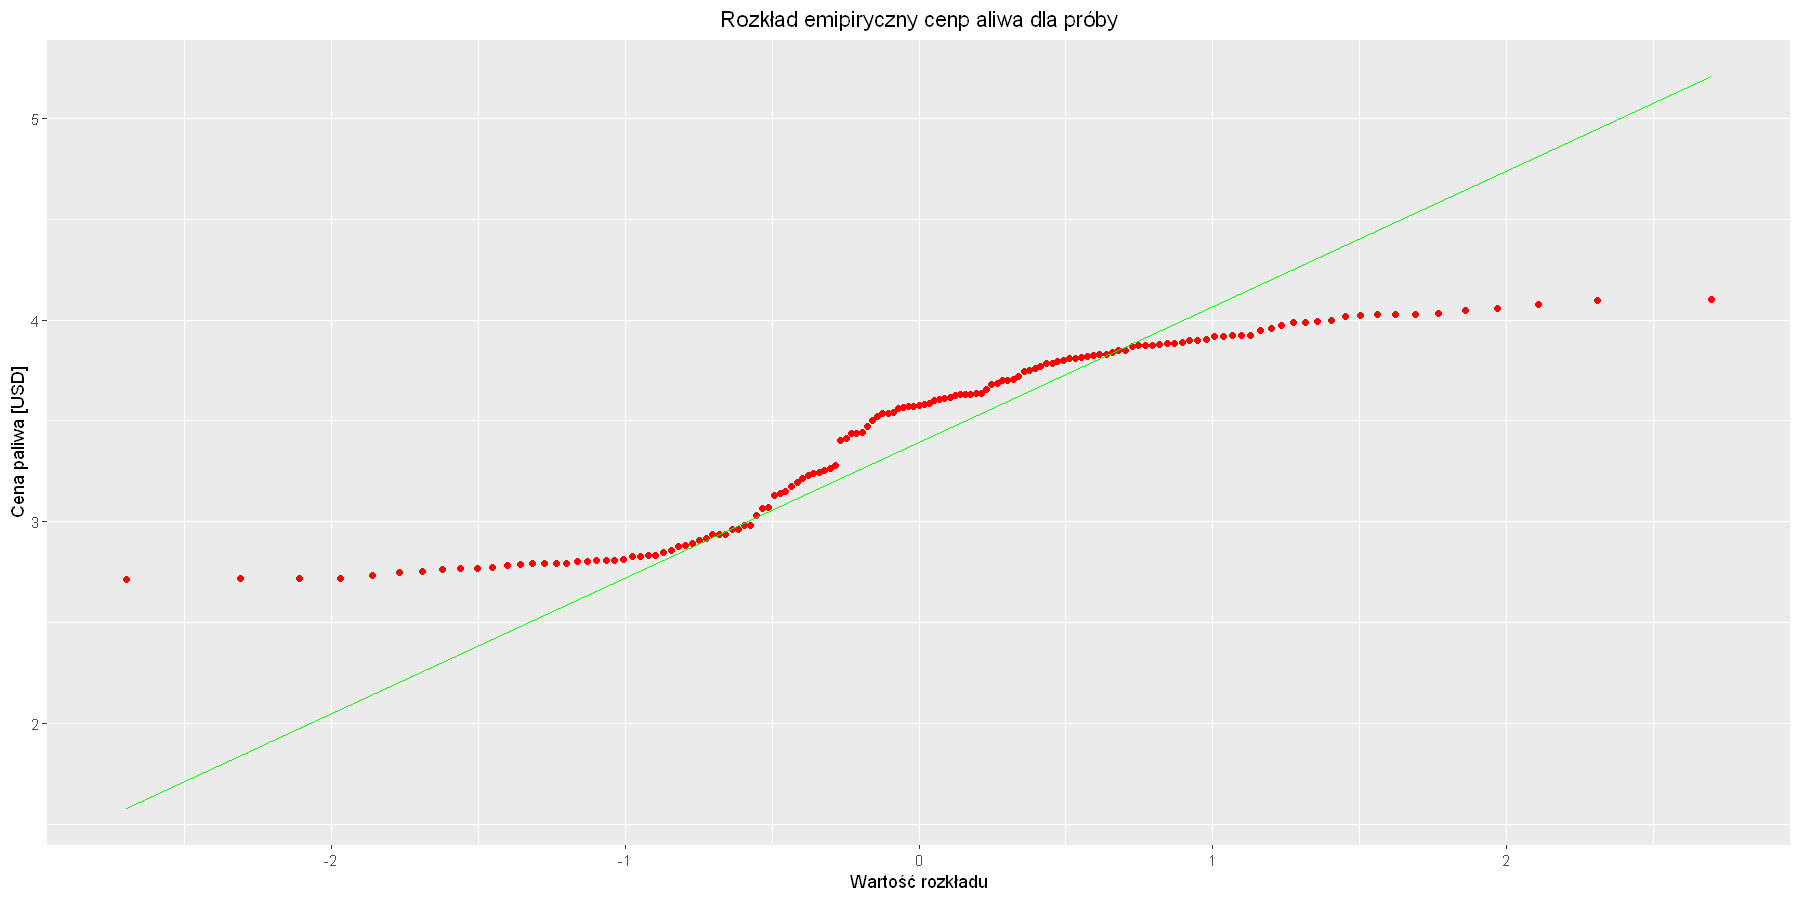

In [43]:
options(repr.plot.width = 15, repr.plot.height = 7.5)
ggplot(dane,aes(sample=Fuel_Price))+
  stat_qq(color="red") +
  stat_qq_line(color="green")+
  xlab("Wartość rozkładu")+
  ylab("Cena paliwa [USD]") +
  ggtitle("Rozkład emipiryczny cen paliwa dla całej populacji") +
  theme(plot.title = element_text(hjust = 0.5))

print("Rozkład poniższej cechy dla całej badanej populacji nie jest normalny")


options(repr.plot.width = 15, repr.plot.height = 7.5)
ggplot(sklep22,aes(sample=Fuel_Price))+
  stat_qq(color="red") +
  stat_qq_line(color="green")+
  xlab("Wartość rozkładu")+
  ylab("Cena paliwa [USD]") +
  ggtitle("Rozkład emipiryczny cenp aliwa dla próby") +
  theme(plot.title = element_text(hjust = 0.5))

print("Rozkład poniższej cechy dla całej badanej populacji nie jest normalny")

# ---------------------------------------------------------------------------------------------------------------

### W przypadku braku spełnienia założeń o normalności rozkładu stosujemy nieparametryczne odpowiedniki istotności - Test Manna-Whitneya.

##### Test istotności - Manna-Whitneya.

H0: Dystrybuatna w pierwszej podpróbie jest taka jaka jak dystrybuatna w drugiej podpróbie.

H1: Dystrybuanty są różne.


In [44]:
wilcox.test(sklep22$Weekly_Sales ~sklep22$Holiday_Flag)


	Wilcoxon rank sum test with continuity correction

data:  sklep22$Weekly_Sales by sklep22$Holiday_Flag
W = 585, p-value = 0.5292
alternative hypothesis: true location shift is not equal to 0


##### Dystrybuanty sprzedaży w dni powszednie oraz w święta  nie sa takie same.

# ---------------------------------------------------------------------------------------------------------------